## Table of Contents <a id = Contents></a>
* [1.0 Preliminary Work](#pre_work)
    * [1.1 Context](#context)
    * [1.2 Key Data Sources](#key-data-sources)
    * [1.3 Problem Statement](#problem-statement)
* [2.0 Exploratory Data Analysis (EDA)](#eda)
    * [2.1 Cleaning, Feature Engineering, Preprocessing & Visualization](#cleaning)
* [3.0 Models](#models)
    * [3.1 Random Forest](#rf)
    * [3.2 linear Regression](#lr)
   
* [4.0 Testing & Evaluation](#testing_evaluation)
    * [4.1 Test Data - Cleaning & Preprocessing](#tdcap)
    * [4.2 Retrain Model w/ Full Training Data](#rm)
***

<h2>1.0 Preliminary Work</h2> <a id = 'pre_work'></a>

***

<h3>1.1 Context</h3> <a id = 'context'></a>

The goal is to create a valuation model for homes in Ames, Iowa.

<h3>1.2 Key Data Sources</h3><a id = key-data-sources></a>

1. Iowa has a really great database for property sales data and has a good amount of features. The data can be retrieved from the City of Ames, government website [here](https://www.cityofames.org/government/departments-divisions-a-h/city-assessor/reports). The associated data dictionary can be retrieved from there as well.


<h2><span style="color:darkred">1.3 Problem Statement</span></h2><a id = problem-statement></a>

**Can we build a model that will predict the sale price of home such that the test accuracy has a pp10 of at least 60%, and an acceptable pp30**

<h2>2.0 Exploratory Data Analysis (EDA)</h2><a id = eda></a>

***

<h3>2.1 Cleaning, Feature Engineering, Preprocessing & Visualization</h3> <a id = 'cleaning'></a>

In [1]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# train.csv file provided by Kaggle
fdata = pd.read_csv('ames_real_estate_data.csv')
data_dict  = pd.read_csv('data_dict.csv')

In [3]:
# check view settings
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)


In [4]:
# view the data
display(fdata.head())
display(data_dict)

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,NaN,1007360045,0,0,2635 SE 16TH ST,hoc,NaN,O-GSE,NaN,COMMERCIAL,RETAIL STORE,DAYTON PARK SD 2ND ADD LOT:6 \n AMES,1,1,EXCHANGERIGHT NET LEASED PORTFOLIO 50 DST,NaN,PO BOX 60308,NaN,PASADENA,CA,91116.0,NaN,2021.0,9.0,202112325,2021.0,9.0,NaN,107700,707500,0,815200,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,1.07,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,2635,SE,16TH,ST,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,NaN
1,520400003.0,520400003,0,0,4499 CARTIER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 6TH ADD \nOUTLOT YY\n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2021.0,8.0,202110700,2021.0,8.0,MSC,339200,0,0,339200,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.00,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4499,NaN,CARTIER,AVE,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,NaN
2,520440010.0,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES,5,45,GENESIS HOMES INC,NaN,750 SE ALICE'S RD,NaN,WAUKEE,IA,50263.0,NaN,2021.0,3.0,2021-02822,2021.0,3.0,WD,5700,0,0,5700,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.00,NRidgHt,12493.0,Vac.Lot,0,0,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,2.0,78000.0,WRDConv,Normal,Deed,4507,NaN,EVEREST,AVE,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,0.0
3,520440020.0,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,SCENIC VALLEY SD 4TH ADD LOT:17 \n AMES,5,45,"YOUNGER, TOYIA KIANA",NaN,4513 EVEREST AVE,NaN,AMES,IA,50014.0,NaN,2021.0,7.0,2021-09126,2021.0,7.0,WD,96300,0,288800,385100,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.00,NRidgHt,9595.0,Dwg&Lot,0,1,1FamDet,2020.0,1-Story,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,1487.0,1487.0,7.0,1.0,0.0,Attachd,2020.0,3.0,641.0,2021.0,7.0,408905.0,NewSold,Partial,Deed,4513,NaN,EVEREST,AVE,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,2.0
4,520440030.0,520440030,0,0,4519 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 6TH ADD LOT:19 \n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2021.0,8.0,202110700,2021.0,8.0,NaN,5100,0,0,5100,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.00,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4519,NaN,EVEREST,AVE,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,NaN


,Field Number,Field Name,Field Start Position,Field Length,Data Type,Description,Notes
0,1,MapRefNo,1,10,Text,Map Reference Number: unique ID for map parcel,No Dashes!!!
1,2,GeoRefNo,11,10,Text,Geo Reference Number: non-unique ID for property,No Dashes!!!
2,3,Tier,21,6,Integer,Tier,Did not bring in when converting to TylerX
3,4,Range,27,6,Integer,Range,Did not bring in when converting to TylerX
4,5,Prop_Addr,33,255,Text,Complete Property Address (7 fields concatenat...,NaN
5,6,ZngCdPr,288,5,Text,"Zoning Code, Primary",NaN
6,7,ZngCdSc,293,5,Text,"Zoning Code, Secondary",NaN
7,8,ZngOLPr,298,5,Text,"Zoning Code -- P & Z Overlay/Floating, Primary",NaN
8,9,ZngOLSc,303,5,Text,"Zoning Code -- P & Z Overlay/Floating, Secondary",NaN
9,10,ClassPr_S,308,11,Text,"Assessor Classification, Primary",NaN


In [5]:
fdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22963 entries, 0 to 22962
Data columns (total 91 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MapRefNo      22962 non-null  float64
 1   GeoRefNo      22963 non-null  int64  
 2   Tier          22963 non-null  int64  
 3   Range         22963 non-null  int64  
 4   Prop_Addr     22941 non-null  object 
 5   ZngCdPr       22854 non-null  object 
 6   ZngCdSc       29 non-null     object 
 7   ZngOLPr       1971 non-null   object 
 8   ZngOLSc       159 non-null    object 
 9   ClassPr_S     22963 non-null  object 
 10  ClassSc_S     22963 non-null  object 
 11  Legal_Pr      22963 non-null  object 
 12  SchD_S        22963 non-null  int64  
 13  TxD_S         22963 non-null  int64  
 14  MA_Ownr1      22963 non-null  object 
 15  MA_Ownr2      3105 non-null   object 
 16  MA_Line1      22948 non-null  object 
 17  MA_Line2      0 non-null      float64
 18  MA_City       22948 non-nu

In [6]:
fdata['YrSold_YYYY'].min()

2017.0

In [7]:
fdata['YrSold_YYYY'].max()

2021.0

**The original dataset has 22,936 entries, however sales data is only included for sales that occured in the past 18-24 months. Due to this, the dataset will be restricted to include only those properties that have sales data.**

In [8]:
# restrict data to sale data
fdata = fdata[~fdata.SalePrice.isnull()]

In [9]:
fdata.shape

(4181, 91)

**4,181 properties have sales data attached and this is will serve as the new complete sample set. Now a quick check of features that have 10% or higher missing values will be removed from the dataset.**

In [10]:
fdata['YrSold_YYYY'].min()

2017.0

In [11]:
fdata['YrSold_YYYY'].max()

2021.0

In [12]:
# check the data for missing values percentage
(fdata.isnull().sum()/fdata.shape[0] * 100)[fdata.isnull().sum()/fdata.shape[0] * 100 > 10]

ZngCdSc      99.928247
ZngOLPr      95.120785
ZngOLSc      99.306386
MA_Ownr2     76.919397
MA_Line2    100.000000
MA_Zip2      50.418560
X1TPr_D      98.851949
X1TSc_D      98.851949
X2TPr_D     100.000000
X2TSc_D     100.000000
X1TPr_S      98.851949
X1TSc_S      98.851949
X2TPr_S     100.000000
X2TSc_S     100.000000
PA-PreD      96.268835
PA-PostD    100.000000
PA-UnTyp     94.211911
PA-UntNo     91.867974
dtype: float64

These columns will be removed as they do not have enough data populated.

In [13]:
fdata.drop(fdata.columns[fdata.isnull().sum()/fdata.shape[0] * 100 > 10].tolist(), axis='columns', inplace=True)

In [14]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4181 entries, 2 to 22939
Data columns (total 73 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MapRefNo      4181 non-null   float64
 1   GeoRefNo      4181 non-null   int64  
 2   Tier          4181 non-null   int64  
 3   Range         4181 non-null   int64  
 4   Prop_Addr     4181 non-null   object 
 5   ZngCdPr       4181 non-null   object 
 6   ClassPr_S     4181 non-null   object 
 7   ClassSc_S     4181 non-null   object 
 8   Legal_Pr      4181 non-null   object 
 9   SchD_S        4181 non-null   int64  
 10  TxD_S         4181 non-null   int64  
 11  MA_Ownr1      4181 non-null   object 
 12  MA_Line1      4176 non-null   object 
 13  MA_City       4176 non-null   object 
 14  MA_State      4176 non-null   object 
 15  MA_Zip1       4176 non-null   float64
 16  Rcrd_Yr       4155 non-null   float64
 17  Rcrd_Mo       4155 non-null   float64
 18  Inst1_No      4155 non-null

Properties that are vacant lots will be removed as well as there are not a lot of features available and these will skew the results. There is most likely a strong relationship between lot area and sale price as this is really the only feature applicable to vacant lots.

In [15]:
fdata.groupby(['ParType'])['SalePrice'].mean()

ParType
2ndDwlg    102823.333333
Bld&Lot     24958.590909
Dwg&Lot    234279.078148
Vac.Lot     86104.621622
Name: SalePrice, dtype: float64

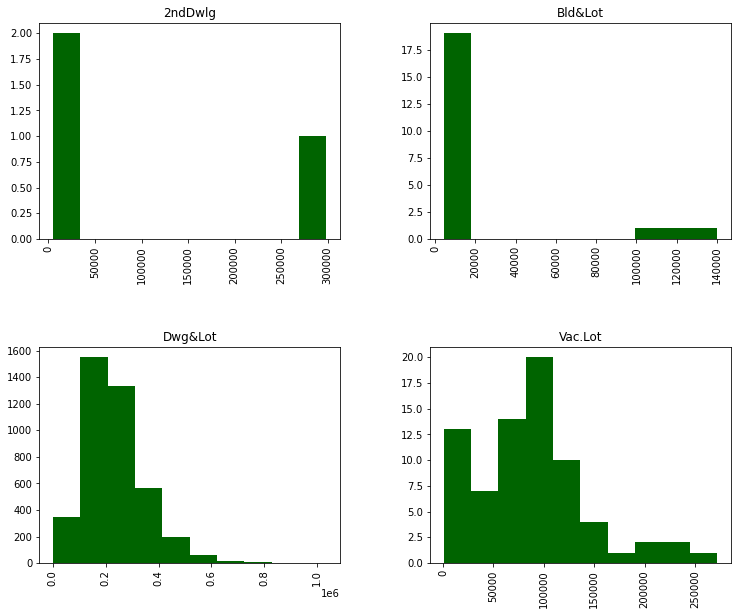

In [16]:
fdata['SalePrice'].hist(by=fdata['ParType'], figsize=(12,10), color='darkgreen')
plt.show()

In [17]:
fdata['ParType'].value_counts()

Dwg&Lot    4082
Vac.Lot      74
Bld&Lot      22
2ndDwlg       3
Name: ParType, dtype: int64

In [18]:
fdata[fdata['ClassSc_S'] == 'MOBILE HOME'].sort_values('SalePrice', ascending=False)

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Line1,MA_City,MA_State,MA_Zip1,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-Strt,PA-StSfx,Date,Source,NmbrBRs
19997,915200075.0,915200305,0,0,305 ORANGE AVE,RLP,RESIDENTIAL,MOBILE HOME,SECTION:15 TOWNSHIP:83 RANGE:24 \nB O L L IR...,1,1,"WHEELER, MATILYN",3346 ELMWOOD AVE,LORIMAR,IA,50149.0,2020.0,10.0,2020-12112,2020.0,10.0,BOS,0,0,20400,20400,F,0,0,0,0,0,0,0,0.0,0.0,0.0,IDOT&RR,0.0,2ndDwlg,0,1,1FamDet,1999.0,1-Story,Slab,No Data,VinylSd,VinylSd,None,GasFWA,Yes,352.0,0.0,0.0,0.0,0.0,Detachd,1970.0,1.0,264.0,2020.0,8.0,5000.0,Other,Abnorml,Deed,305,ORANGE,AVE,31-Mar-22,Ames City Assessor,0.0
19998,915200075.0,915200305,0,0,305 ORANGE AVE,RLP,RESIDENTIAL,MOBILE HOME,SECTION:15 TOWNSHIP:83 RANGE:24 \nB O L L IR...,1,1,"WHEELER, MATILYN",3346 ELMWOOD AVE,LORIMAR,IA,50149.0,2020.0,10.0,2020-12112,2020.0,10.0,BOS,0,0,20400,20400,F,0,0,0,0,0,0,0,0.0,0.0,0.0,IDOT&RR,0.0,2ndDwlg,0,1,1FamDet,1999.0,1-Story,Slab,No Data,VinylSd,VinylSd,None,GasFWA,Yes,352.0,0.0,0.0,0.0,0.0,Detachd,1970.0,1.0,264.0,2020.0,5.0,5000.0,Other,Abnorml,Deed,305,ORANGE,AVE,31-Mar-22,Ames City Assessor,0.0


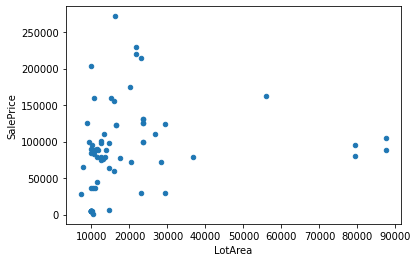

In [19]:
fdata[fdata['ParType'] == 'Vac.Lot'].sort_values('SalePrice', ascending=False).plot(kind='scatter', x='LotArea', y='SalePrice')
plt.show()

In [20]:
fdata[fdata['ParType'] == 'Vac.Lot'].sort_values('SalePrice', ascending=False)

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Line1,MA_City,MA_State,MA_Zip1,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-Strt,PA-StSfx,Date,Source,NmbrBRs
3859,529290010.0,529290010,0,0,3415 SCENIC POINT,F-PRD,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC POINT SD 1ST ADD LOT:7 \n AMES,5,45,"STEVERMER, SCOTT M & KRISTEN E",3431 SCENIC POINT,AMES,IA,50014.0,2018.0,11.0,2018-10339,2018.0,11.0,WRDJSV,111600,0,0,111600,F,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,16196.0,Vac.Lot,0,0,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2018.0,10.0,271636.0,WRDConv,Alloca,Deed,3415,SCENIC POINT,NaN,31-Mar-22,Ames City Assessor,0.0
189,522135070.0,522135070,0,0,1620 ADA HAYDEN RD,FS-RL,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,QUARRY ESTATES SD 1ST ADD LOT:16 \n AMES,5,45,HUNZIKER CONSTRUCTION SERVICES INC,105 S 16TH ST,AMES,IA,50010.0,2020.0,4.0,2020-03364,2020.0,4.0,WD,126100,0,0,126100,F,0,0,0,0,0,0,0,0.0,0.0,0.0,HaydnLk,21738.0,Vac.Lot,0,1,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2018.0,1.0,230000.0,WRDConv,Normal,Deed,1620,ADA HAYDEN,RD,31-Mar-22,Ames City Assessor,0.0
188,522135070.0,522135070,0,0,1620 ADA HAYDEN RD,FS-RL,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,QUARRY ESTATES SD 1ST ADD LOT:16 \n AMES,5,45,HUNZIKER CONSTRUCTION SERVICES INC,105 S 16TH ST,AMES,IA,50010.0,2020.0,4.0,2020-03364,2020.0,4.0,WD,126100,0,0,126100,F,0,0,0,0,0,0,0,0.0,0.0,0.0,HaydnLk,21738.0,Vac.Lot,0,1,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2020.0,4.0,220000.0,WRDConv,Normal,Deed,1620,ADA HAYDEN,RD,31-Mar-22,Ames City Assessor,0.0
186,522135060.0,522135060,0,0,1610 ADA HAYDEN RD,FS-RL,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,QUARRY ESTATES SD 1ST ADD LOT:17 \n AMES,5,45,"CHITTY, PATRICK W & KARIN J CO-TRUSTEES",1610 ADA HAYDEN RD,AMES,IA,50010.0,2022.0,3.0,2022-01890,2022.0,3.0,Q,176600,0,476600,653200,P,0,0,0,0,0,0,0,0.0,0.0,0.0,HaydnLk,22952.0,Vac.Lot,0,1,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2020.0,12.0,215000.0,WRDConv,Normal,Deed,1610,ADA HAYDEN,RD,31-Mar-22,Ames City Assessor,0.0
109,522105080.0,522105080,0,0,1623 LEDGES DR,FS-RL,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,QUARRY ESTATES SD 2ND ADD LOT:7 \n AMES,5,45,HAPPE HOMES LLP,2575 N ANKENY BLVD STE 211,ANKENY,IA,50023.0,2020.0,8.0,2020-09101,2020.0,8.0,WD,80100,0,50500,130600,P,0,0,0,0,0,0,0,0.0,0.0,0.0,HaydnLk,9801.0,Vac.Lot,0,1,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2020.0,7.0,204000.0,WRDConv,Abnorml,Deed,1623,LEDGES,DR,31-Mar-22,Ames City Assessor,0.0
201,522135160.0,522135160,0,0,5600 MCFARLAND AVE,FS-RL,RESIDENTIAL,2-STORY 1946 & NEWER,QUARRY ESTATES SD 4TH ADD LOT:12 \n AMES,5,45,"GLOTFELTY, JOSEPH W & KELLEY M",2503 CAMDEN DR,AMES,IA,50010.0,2019.0,11.0,2019-10551,2019.0,11.0,WRDJSV,225500,0,358500,584000,P,0,0,0,0,0,0,0,0.0,0.0,0.0,HaydnLk,20065.0,Vac.Lot,0,1,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2019.0,10.0,175000.0,WRDConv,Normal,Deed,5600,MCFARLAND,AVE,31-Mar-22,Ames City Assessor,0.0
3808,529240080.0,529240080,0,0,4215 CARTIER AVE,FS-RL,RESIDENTIAL,2-STORY 1946 & NEWER,SCENIC VALLEY SD 1ST ADD LOT:8 \n AMES,5,45,"BUTLER, ZACHARY R & KAREN E",4

In [21]:
fdata[fdata['MA_Line1'] == '3403 HONEYSUCKLE RD'].sort_values('SalePrice', ascending=False)

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Line1,MA_City,MA_State,MA_Zip1,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-Strt,PA-StSfx,Date,Source,NmbrBRs
2998,528328100.0,528328100,0,0,3403 HONEYSUCKLE RD,RL,RESIDENTIAL,2-STORY 1946 & NEWER,NORTHRIDGE PARKWAY SD 17TH ADD LOT:12 \n AMES,1,1,"MAUTON, MICHAEL L & ANDREA M",3403 HONEYSUCKLE RD,AMES,IA,50014.0,2020.0,8.0,2020-08737,2020.0,8.0,WRDJSV,105900,0,317800,423700,F,0,0,0,0,0,0,0,0.0,0.0,0.0,NoRidge,14774.0,Dwg&Lot,0,1,1FamDet,1999.0,2-Story,P'Conc,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2617.0,1406.0,10.0,2.0,0.0,BuiltIn,1999.0,3.0,782.0,2020.0,7.0,427500.0,WRDConv,Normal,Deed,3403,HONEYSUCKLE,RD,31-Mar-22,Ames City Assessor,4.0
12329,907295175.0,907295482,0,0,4511 TWAIN CIR UNIT 204,RH,RESIDENTIAL,1-LEVEL CONDO 1946 & NEWER,DAKOTA RIDGE I CONDOMINIUMS \nUNIT 204\n AMES,1,1,S & I REALTY LLC,3403 HONEYSUCKLE RD,AMES,IA,50014.0,2019.0,3.0,2019-02044,2019.0,3.0,WD,13700,0,77800,91500,F,0,0,0,0,0,0,0,0.0,0.0,0.0,DakotaR,1023.0,Dwg&Lot,0,1,Condo,2005.0,1-Story,P'Conc,CompShg,BrkFace,MetalSd,None,GasFWA,Yes,595.0,0.0,4.0,0.0,0.0,No Data,0.0,0.0,0.0,2019.0,3.0,101000.0,WRDConv,Normal,Deed,4511,TWAIN,CIR,31-Mar-22,Ames City Assessor,1.0
12321,907295175.0,907295440,0,0,4511 TWAIN CIR UNIT 101,RH,RESIDENTIAL,1-LEVEL CONDO 1946 & NEWER,DAKOTA RIDGE I CONDOMINIUMS \nUNIT 101\n AMES,1,1,J & S REALTY LLC,3403 HONEYSUCKLE RD,AMES,IA,50014.0,2017.0,6.0,2017-05598,2017.0,6.0,WD,14700,0,83200,97900,F,0,0,0,0,0,0,0,0.0,0.0,0.0,DakotaR,1115.0,Dwg&Lot,0,1,Condo,2005.0,1-Story,P'Conc,CompShg,BrkFace,MetalSd,None,GasFWA,Yes,649.0,0.0,4.0,0.0,0.0,No Data,0.0,0.0,0.0,2017.0,6.0,97606.0,WRDConv,Alloca,Deed,4511,TWAIN,CIR,31-Mar-22,Ames City Assessor,1.0
12326,907295175.0,907295465,0,0,4511 TWAIN CIR UNIT 201,RH,RESIDENTIAL,1-LEVEL CONDO 1946 & NEWER,DAKOTA RIDGE I CONDOMINIUMS \nUNIT 201\n AMES,1,1,J & S REALTY LLC,3403 HONEYSUCKLE RD,AMES,IA,50014.0,2019.0,3.0,2019-02058,2019.0,3.0,WD,14700,0,83200,97900,F,0,0,0,0,0,0,0,0.0,0.0,0.0,DakotaR,1115.0,Dwg&Lot,0,1,Condo,2005.0,1-Story,P'Conc,CompShg,BrkFace,MetalSd,None,GasFWA,Yes,649.0,0.0,4.0,0.0,0.0,No Data,0.0,0.0,0.0,2019.0,3.0,87268.0,WRDConv,Alloca,Deed,4511,TWAIN,CIR,31-Mar-22,Ames City Assessor,1.0
12489,907295175.0,907295550,0,0,4511 TWAIN CIR UNIT G6,RH,RESIDENTIAL,GARAGE UNIT-CONDO,DAKOTA RIDGE I CONDOMINIUMS \nUNIT G6\n AMES,1,1,J & S REALTY LLC,3403 HONEYSUCKLE RD,AMES,IA,50014.0,2017.0,6.0,2017-05598,2017.0,6.0,WD,1900,0,10500,12400,F,0,0,0,0,0,0,0,0.0,0.0,0.0,DakotaR,368.0,Bld&Lot,0,0,Condo,2005.0,No Data,P'Conc,CompShg,MetalSd,BrkFace,No Data,No Data,No,0.0,0.0,0.0,0.0,0.0,Detachd,2006.0,1.0,214.0,2017.0,6.0,12394.0,WRDConv,Alloca,Deed,4511,TWAIN,CIR,31-Mar-22,Ames City Assessor,0.0
12493,907295175.0,907295570,0,0,4511 TWAIN CIR UNIT G10,RH,RESIDENTIAL,GARAGE UNIT-CONDO,DAKOTA RIDGE I CONDOMINIUMS \nUNIT G10\n AMES,1,1,J & S REALTY LLC,3403 HONEYSUCKLE RD,AMES,IA,50014.0,2019.0,3.0,2019-02058,2019.0,3.0,WD,1900,0,10500,12400,F,0,0,0,0,0,0,0,0.0,0.0,0.0,DakotaR,362.0,Bld&Lot,0,0,Condo,2005.0,No Data,P'Conc,CompShg,MetalSd,BrkFace,No Data,No Data,No,0.0,0.0,0.0,0.0,0.0,Detachd,2006.0,1.0,210.0,2019.0,3.0,11082.0,WRDConv,Alloca,Deed,4511,TWAIN,CIR,31-Mar-22,Ames City Assessor,0.0
12316,907295175.0,907295415,0,0,4511 TWAIN CIR UNIT S4,RH,RESIDENTIAL,STORAGE UNIT-CONDO,DAKOTA RIDGE I CONDOMINIUMS \nUNIT S4\n AMES,1,1,J & S REALTY LLC,3403 HONEYSUCKLE RD,AMES,IA,50014.0,2019.0,3.0,2019-02058,2019.0,3.0,WD,800,0,4400,5200,F,0,0,0,0,0,0,0,0.0,0.0,0.0,DakotaR,83.0,Bl

In [22]:
# vacant lots do not good attribute information and are considered outliers for this model, so those will be removed.
fdata[fdata.ParType == 'Vac.Lot']

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Line1,MA_City,MA_State,MA_Zip1,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-Strt,PA-StSfx,Date,Source,NmbrBRs
2,520440010.0,520440010,0,0,4507 EVEREST AVE,FS-RL,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES,5,45,GENESIS HOMES INC,750 SE ALICE'S RD,WAUKEE,IA,50263.0,2021.0,3.0,2021-02822,2021.0,3.0,WD,5700,0,0,5700,L,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,12493.0,Vac.Lot,0,0,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,2.0,78000.0,WRDConv,Normal,Deed,4507,EVEREST,AVE,31-Mar-22,Ames City Assessor,0.0
19,520450020.0,520450020,0,0,4415 EVEREST CIR,FS-RL,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,SCENIC VALLEY SD 4TH ADD LOT:14 \n AMES,5,45,HAPPE HOMES LLP,2575 N ANKENY BLVD STE 211,ANKENY,IA,50021.0,2021.0,4.0,2021-04915,2021.0,4.0,WD,102400,0,172000,274400,P,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,10890.0,Vac.Lot,0,1,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,4.0,88000.0,WRDConv,Normal,Deed,4415,EVEREST,CIR,31-Mar-22,Ames City Assessor,0.0
20,520450030.0,520450030,0,0,4409 EVEREST CIR,FS-RL,RESIDENTIAL,2-STORY 1946 & NEWER,SCENIC VALLEY SD 4TH ADD LOT:13 \n AMES,5,45,HAPPE HOMES LLP,2575 N ANKENY BLVD STE 211,ANKENY,IA,50023.0,2021.0,4.0,2021-04911,2021.0,4.0,WD,117600,0,176400,294000,P,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,10842.0,Vac.Lot,0,1,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,4.0,88000.0,WRDConv,Normal,Deed,4409,EVEREST,CIR,31-Mar-22,Ames City Assessor,0.0
22,520450050.0,520450050,0,0,4412 EVEREST CIR,FS-RL,RESIDENTIAL,2-STORY 1946 & NEWER,SCENIC VALLEY SD 4TH ADD LOT:8 \n AMES,5,45,"WOOD, KATHERINE",4412 EVEREST CIR,AMES,IA,50014.0,2021.0,9.0,2021-11467,2021.0,9.0,WRDJSV,97800,0,293300,391100,F,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,10893.0,Vac.Lot,0,1,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,5.0,88000.0,WRDConv,Normal,Deed,4412,EVEREST,CIR,31-Mar-22,Ames City Assessor,0.0
26,520470020.0,520470020,0,0,4511 ALDRIN AVE,FS-RL,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:21 \n AMES,5,45,HAPPE HOMES LLP,2575 N ANKENY BLVD STE 211,ANKENY,IA,50023.0,2021.0,2.0,2021-01966,2021.0,2.0,WD,6800,0,0,6800,L,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,15049.0,Vac.Lot,0,0,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,1.0,160000.0,WRDConv,Abnorml,Deed,4511,ALDRIN,AVE,31-Mar-22,Ames City Assessor,0.0
35,520475010.0,520475010,0,0,4506 ALDRIN AVE,FS-RL,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:23 \n AMES,5,45,GENESIS HOMES INC,750 SE ALICE'S RD,WAUKEE,IA,50263.0,2021.0,3.0,2021-02821,2021.0,3.0,WD,7300,0,0,7300,L,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,16059.0,Vac.Lot,0,0,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,2.0,156000.0,WRDConv,Abnorml,Deed,4506,ALDRIN,AVE,31-Mar-22,Ames City Assessor,0.0
36,520475020.0,520475020,0,0,4512 ALDRIN AVE,FS-RL,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,SCENIC VALLEY SD 4TH ADD LOT:22 \n AMES,5,45,"LARSON, DANE N & TANYA J",4512 ALDRIN AVE,AMES,IA,50014.0,2021.0,12.0,2021-15717,2021.0,12.0,WRDJSV,90900,0,272500,363400,F,0,0,0,0,0,0,0,0.0,0.0

In [23]:
fdata = fdata[(fdata.ParType != 'Vac.Lot') & (fdata.ParType != 'Bld&Lot') & (fdata.ParType != '2ndDwlg')]

In [24]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 3 to 22939
Data columns (total 73 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MapRefNo      4082 non-null   float64
 1   GeoRefNo      4082 non-null   int64  
 2   Tier          4082 non-null   int64  
 3   Range         4082 non-null   int64  
 4   Prop_Addr     4082 non-null   object 
 5   ZngCdPr       4082 non-null   object 
 6   ClassPr_S     4082 non-null   object 
 7   ClassSc_S     4082 non-null   object 
 8   Legal_Pr      4082 non-null   object 
 9   SchD_S        4082 non-null   int64  
 10  TxD_S         4082 non-null   int64  
 11  MA_Ownr1      4082 non-null   object 
 12  MA_Line1      4077 non-null   object 
 13  MA_City       4077 non-null   object 
 14  MA_State      4077 non-null   object 
 15  MA_Zip1       4077 non-null   float64
 16  Rcrd_Yr       4056 non-null   float64
 17  Rcrd_Mo       4056 non-null   float64
 18  Inst1_No      4056 non-null

In [25]:
fdata['MoSold_MM']

3         7.0
18        6.0
23        1.0
24        1.0
25        1.0
         ... 
22779     7.0
22797     6.0
22854    12.0
22888     8.0
22939    12.0
Name: MoSold_MM, Length: 4082, dtype: float64

In [26]:
rdhpi = {2.0:1,
         3.0:1,
         5.0:4,
         6.0:4,
         8.0:7,
         9.0:7,
         11.0:10,
         12.0:10}

fdata['MoSold_MM'] = fdata['MoSold_MM'].replace(rdhpi)
fdata['MoSold_MM']



fdata['YrSold_YYYY'] = fdata['YrSold_YYYY'].astype('object')
fdata['YrSold_YYYY']
fdata['MoSold_MM']

3         7.0
18        4.0
23        1.0
24        1.0
25        1.0
         ... 
22779     7.0
22797     4.0
22854    10.0
22888     7.0
22939    10.0
Name: MoSold_MM, Length: 4082, dtype: float64

In [27]:
hpi_data = pd.read_csv('hpi_data.csv')
hpi_data['MoSold_MM'] = hpi_data['MoSold_MM'].astype('object')
hpi_data['YrSold_YYYY'] = hpi_data['YrSold_YYYY'].astype('object')
hpi_data.dtypes

MoSold_MM       object
YrSold_YYYY     object
hpi_ames       float64
dtype: object

In [28]:
hpi_data

,MoSold_MM,YrSold_YYYY,hpi_ames
0,1,2017,192.54
1,4,2017,199.93
2,7,2017,202.75
3,10,2017,201.51
4,1,2018,199.81
5,4,2018,207.14
6,7,2018,206.23
7,10,2018,204.86
8,1,2019,208.32
9,4,2019,212.30


In [29]:
fdata = pd.merge(fdata, hpi_data, on=['MoSold_MM', 'YrSold_YYYY'], how='left')

**After removing vacant lots, there are now 4,082 observations in the dataset that may be useful for modeling.** Now the train and test set will be split to avoid data leakage.

In [30]:
# test categorical variables to see which ones correlate well with sale price, but only after splitting the data
from sklearn.model_selection import train_test_split

# split data
X = fdata.drop(['SalePrice'], axis='columns')
y = fdata.SalePrice


In [31]:
# create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 28)

In [32]:
X_train['PoolArea']

1686    0.0
593     0.0
3276    0.0
3963    0.0
2666    0.0
       ... 
3104    0.0
2036    0.0
1302    0.0
1541    0.0
1281    0.0
Name: PoolArea, Length: 3061, dtype: float64

In [33]:
# from here on out work with the training set only to avoid data leakage
fdata = X_train.copy()

In [34]:
zill_test = X_test.copy()

In [35]:
# start EDA for features
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3061 entries, 1686 to 1281
Data columns (total 73 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MapRefNo      3061 non-null   float64
 1   GeoRefNo      3061 non-null   int64  
 2   Tier          3061 non-null   int64  
 3   Range         3061 non-null   int64  
 4   Prop_Addr     3061 non-null   object 
 5   ZngCdPr       3061 non-null   object 
 6   ClassPr_S     3061 non-null   object 
 7   ClassSc_S     3061 non-null   object 
 8   Legal_Pr      3061 non-null   object 
 9   SchD_S        3061 non-null   int64  
 10  TxD_S         3061 non-null   int64  
 11  MA_Ownr1      3061 non-null   object 
 12  MA_Line1      3057 non-null   object 
 13  MA_City       3057 non-null   object 
 14  MA_State      3057 non-null   object 
 15  MA_Zip1       3057 non-null   float64
 16  Rcrd_Yr       3039 non-null   float64
 17  Rcrd_Mo       3039 non-null   float64
 18  Inst1_No      3039 non-nu

Some features need to be created or removed. Creating an age feature seems like a good bet as the age of a property usually correlates to the sale price. This can be created by subtracting the year built from the year sold.  The same will be done for the garage. Usually the garage would have been built the same time as the property but if it was via remodel then that unit change should be captured if it holds a significant dollar value.

The columns that have unique IDs will be dropped. These columns should not be used in the model. The build year will also be dropped as it now correlates with the age feature that was created.

In [36]:
# the goal is to build a linear regression model to identify dollar value per unit change
# start developing new feature from what is given

# find age at the time of sale
fdata['Age'] = fdata['YrSold_YYYY'] - fdata['YrBuilt']
fdata['GarageAge'] = fdata['YrSold_YYYY'] - fdata['GarYrBlt']

# drop unique ID variables
fdata.drop(['MapRefNo', 'GeoRefNo', 'Prop_Addr', 'Legal_Pr', 'MA_Ownr1', 
            'MA_City', 'MA_Line1', 'MA_State', 'MA_Zip1', 'YrBuilt', 'BldgNo_S'], axis='columns', inplace=True)


In [37]:
fdata['SalePrice']  = y_train

In [38]:
fdata['Age'] = fdata['Age'].astype('float')
fdata['GarageAge'] = fdata['GarageAge'].astype('float')

<AxesSubplot:>

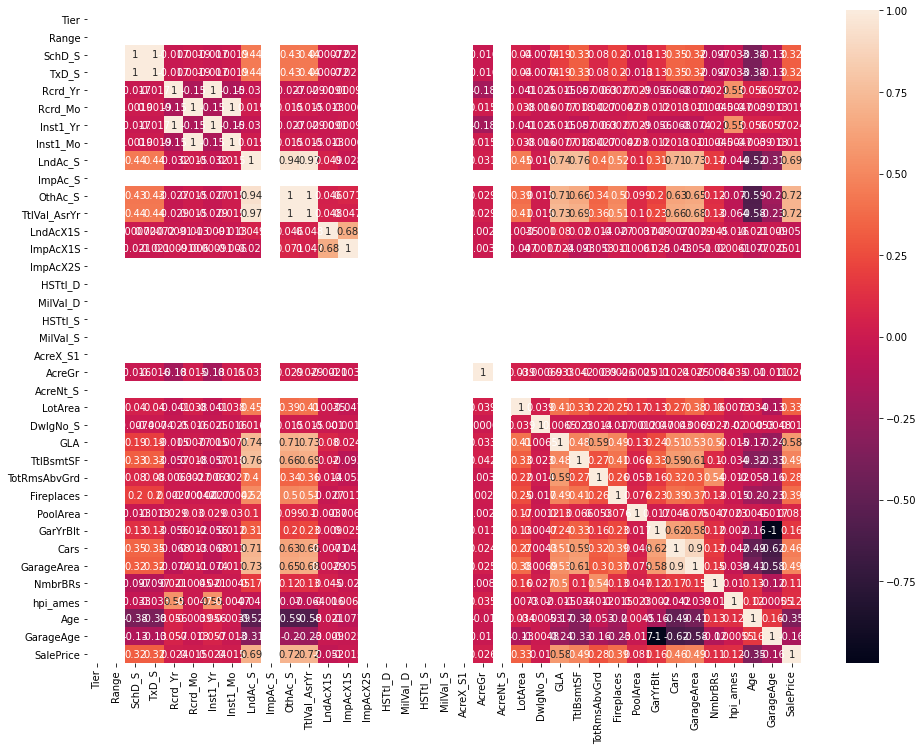

In [39]:
# check numerical features in target variable
fig, ax = plt.subplots(figsize=(16,12)) 
sns.heatmap(fdata.corr(), annot=True )

The heatmap shows some features have zero values in the entire column. These features need to be dropped as they contribute nothing to the model.

In [40]:
fdata.sum(axis=0)


Tier                                                            0
Range                                                           0
ZngCdPr         RLFS-RLRHF-PRDFS-RLFS-RLRLRLRLUCRMRLFS-RLRLF-P...
ClassPr_S       RESIDENTIALRESIDENTIALRESIDENTIALRESIDENTIALRE...
ClassSc_S       1-STORY 1946 & NEWER ALL STYLES1-STORY 1946 & ...
SchD_S                                                       4821
TxD_S                                                       22421
Rcrd_Yr                                                6.1368e+06
Rcrd_Mo                                                     20230
Inst1_Yr                                               6.1368e+06
Inst1_Mo                                                    20230
LndAc_S                                                 184059500
ImpAc_S                                                         0
OthAc_S                                                 567286600
TtlVal_AsrYr                                            751346100
ValType   

In [41]:
# drop variables
fdata.drop(['Tier', 'Range', 'ImpAc_S', 'ImpAcX2S', 'HSTtl_D', 
            'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1', 'AcreNt_S'], axis='columns', inplace=True)

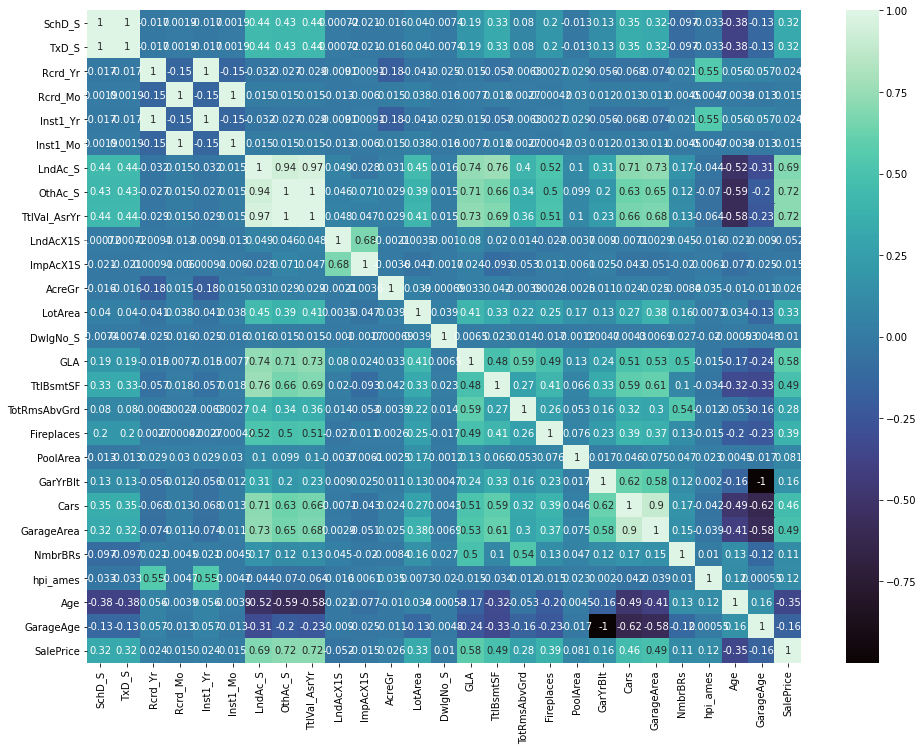

In [42]:
# check numerical features in target variable
fig, ax = plt.subplots(figsize=(16,12)) 
sns.heatmap(fdata.corr(), annot=True, cmap='mako' )
plt.show()
fig.savefig('corrplot.png')

In [43]:
fig.savefig('corrplot.png')

Numerical Features Discovery (high correlations):

SchD_S:
This feature should actually be categorical, not numerical. There are 2 school districts and the relationship should be tested via t-test.

TxD_S:
This feature should actually be categorical, not numerical. There are 2 tax districts and the relationship should be tested via t-test.

LndAc_S:
OthAc_S:
TtlVal_Asryr:
These features all correlate well to Sale Price.

Variables to Drop:
anything with correlation less than 10% to be inclusive:

Drop garage Area as Cars correlates well with it, it is actually a proxy for garage area.





In [44]:
fdata['SchD_S'] = fdata['SchD_S'].astype('category')
fdata['TxD_S']  = fdata['TxD_S'].astype('category')

In [45]:
fdata['TxD_S']  = fdata['TxD_S'].astype('category')

In [46]:
num_cols_to_keep = [
 'LotArea',
 'GLA',
 'TtlBsmtSF',
 'TotRmsAbvGrd',
 'TtlVal_AsrYr',
 'Fireplaces',
 'PoolArea',
 'Cars',
 'NmbrBRs',
 'hpi_ames',
 'SalePrice',
'GarageAge',
'Age']

In [47]:
cols_to_drop = ['Rcrd_Yr',
 'Rcrd_Mo',
 'Inst1_Yr',
 'Inst1_Mo',
 'LndAcX1S',
 'ImpAcX1S',
 'AcreGr', 
'LndAc_S',
 'OthAc_S',]

In [48]:
fdata.corr().columns.to_list()

['Rcrd_Yr',
 'Rcrd_Mo',
 'Inst1_Yr',
 'Inst1_Mo',
 'LndAc_S',
 'OthAc_S',
 'TtlVal_AsrYr',
 'LndAcX1S',
 'ImpAcX1S',
 'AcreGr',
 'LotArea',
 'DwlgNo_S',
 'GLA',
 'TtlBsmtSF',
 'TotRmsAbvGrd',
 'Fireplaces',
 'PoolArea',
 'GarYrBlt',
 'Cars',
 'GarageArea',
 'NmbrBRs',
 'hpi_ames',
 'Age',
 'GarageAge',
 'SalePrice']

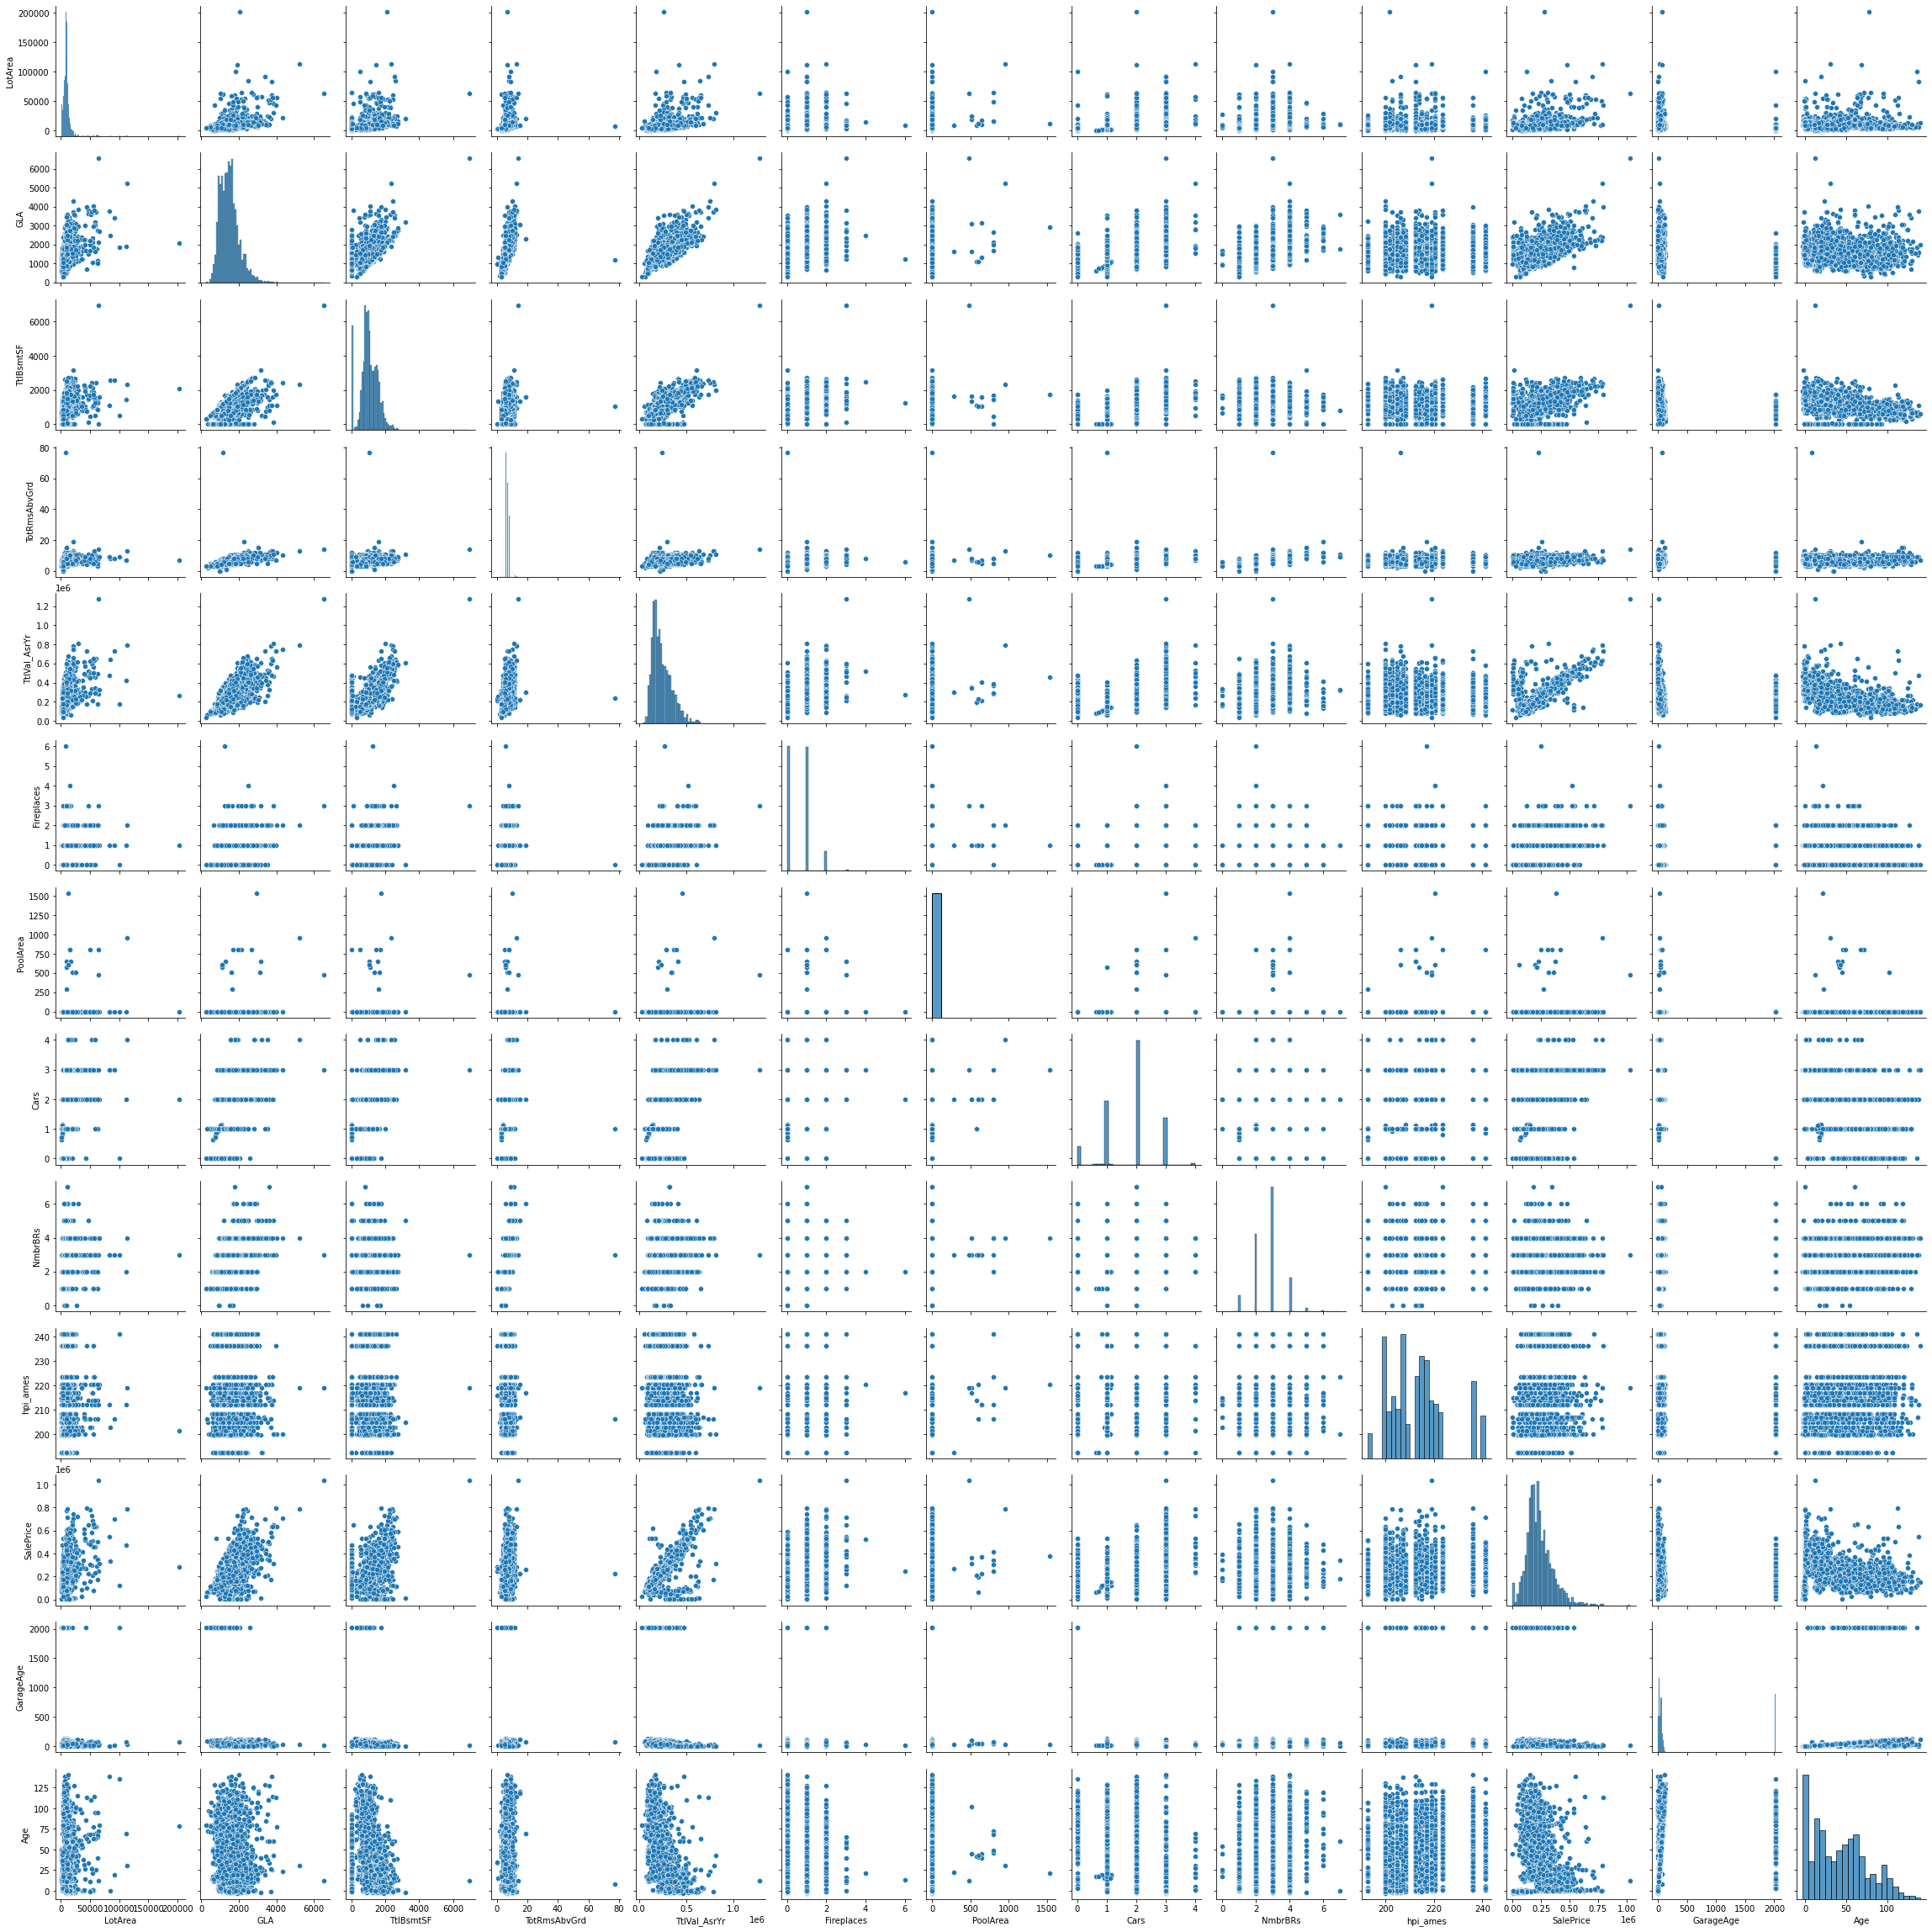

In [49]:
sns.pairplot(data=fdata[num_cols_to_keep])

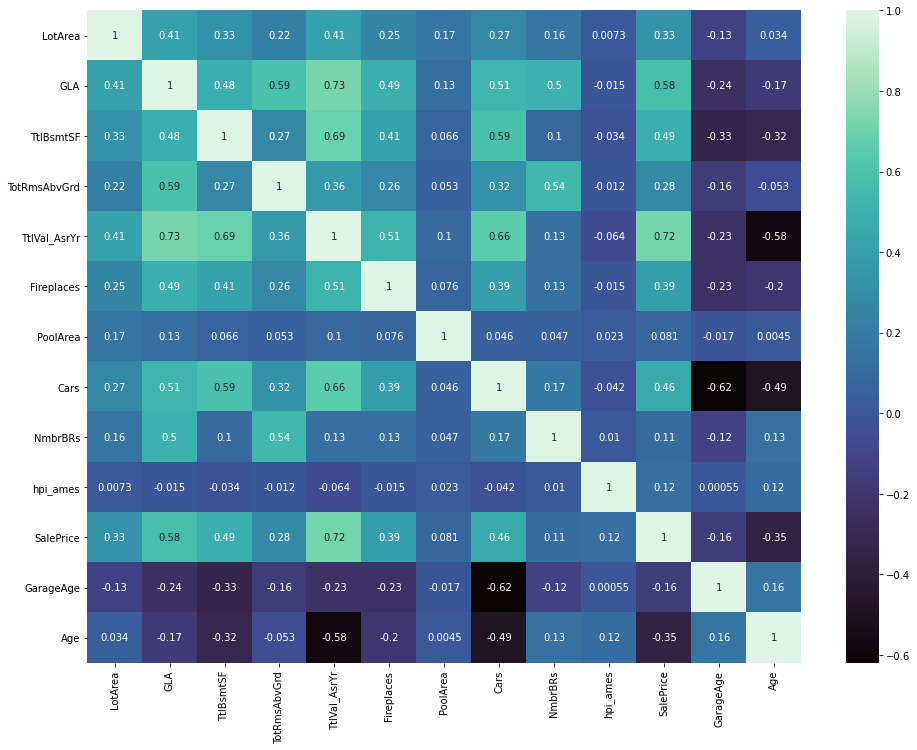

In [50]:
# check numerical features in target variable
fig, ax = plt.subplots(figsize=(16,12)) 
sns.heatmap(fdata[num_cols_to_keep].corr(), annot=True, cmap='mako' )
plt.show()
fig.savefig('corrplot2.png')

After inspecting the pair  plots there are a few variables that need to be converted. PoolArea is dominated by the zero values which means that this feature should just be converted to a binary categorical variable, either the property has a pool or does not.

fireplaces, number of bedrooms, cars, and dwelling units need to be converted as well.


In [51]:
fdata['PoolArea'][fdata['PoolArea'] != 0] = 'Yes'

In [52]:
fdata['PoolArea'][fdata['PoolArea'] == 0] = 'No'

In [53]:
fdata['Cars'][fdata['Cars'] < 2] = 1

In [54]:
fdata['Cars'].value_counts()

2.0    1495
1.0     989
3.0     563
4.0      14
Name: Cars, dtype: int64

In [55]:
for col in [
 'PoolArea']:
    fdata[col] = fdata[col].astype('category')

In [56]:
num_cols_to_keep = [
 'LotArea',
 'Fireplaces',
 'Cars',
 'NmbrBRs',
 'GLA',
 'TtlBsmtSF',
 'TotRmsAbvGrd',
 'SalePrice']

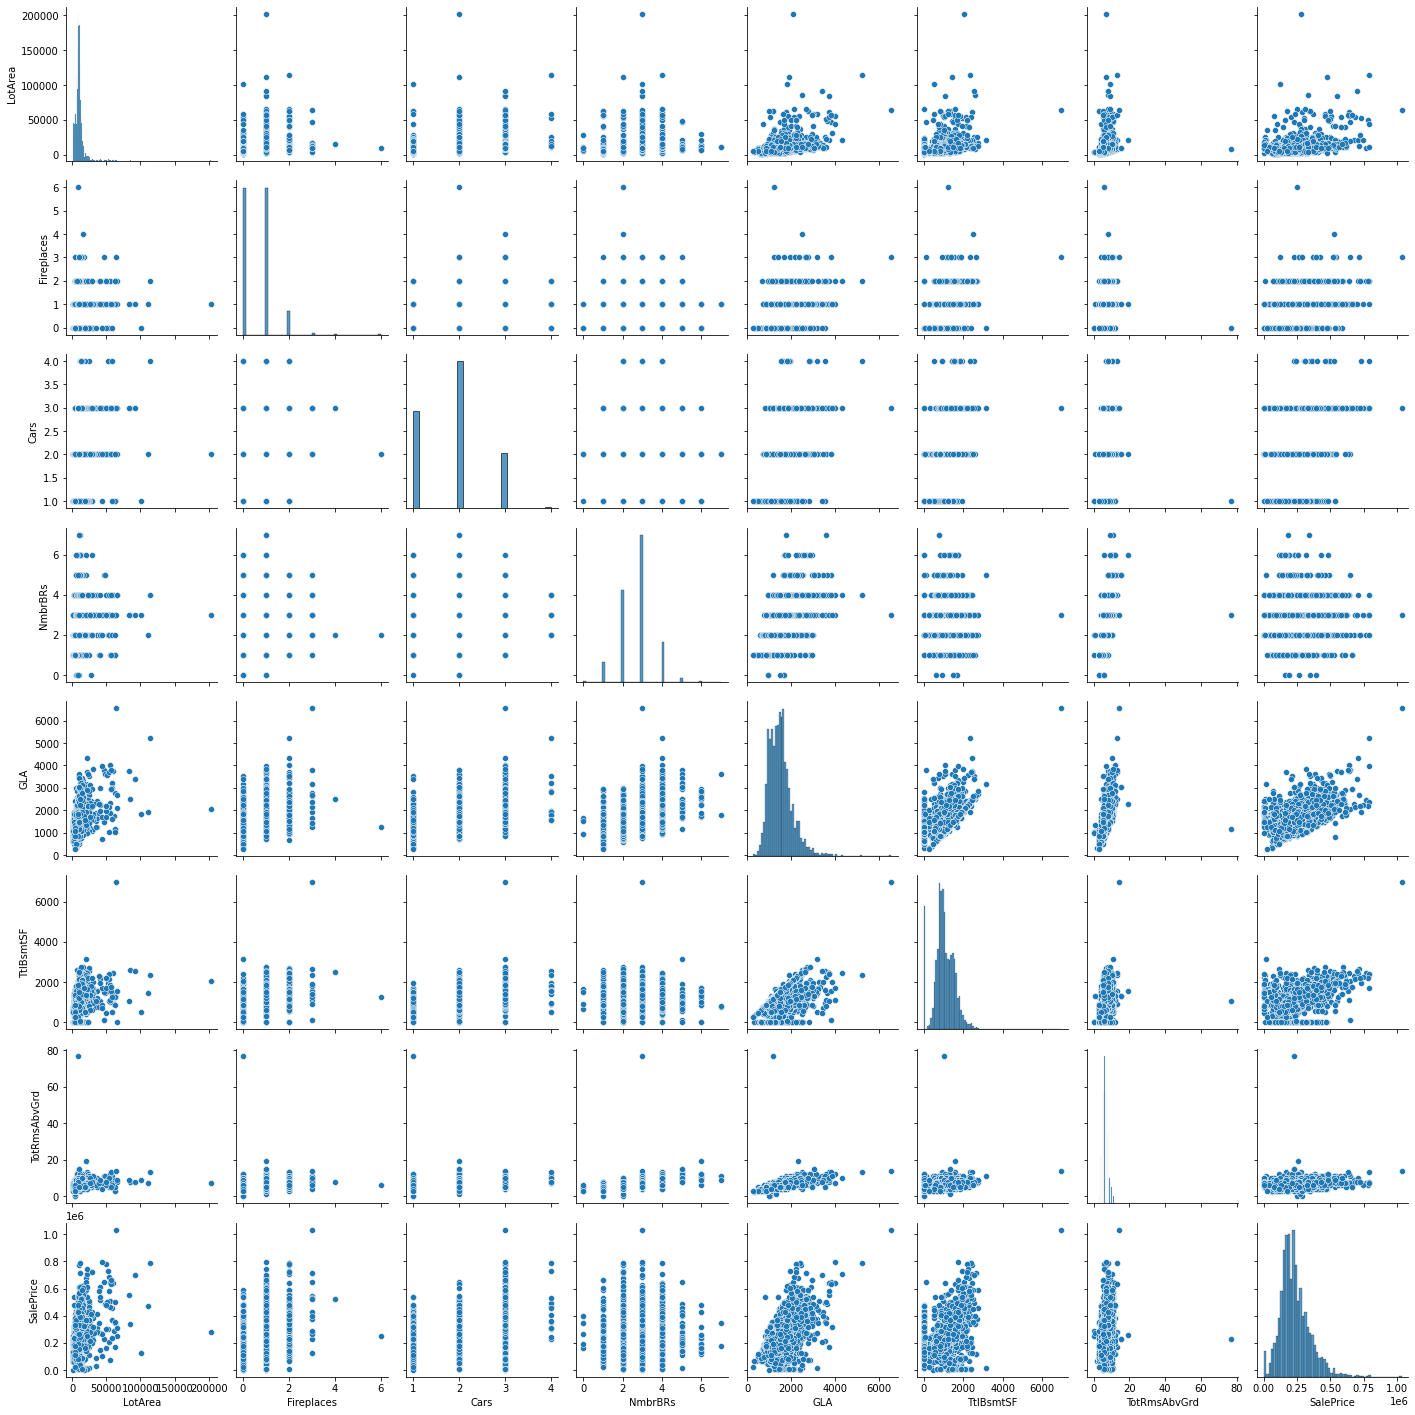

In [57]:
sns.pairplot(data=fdata[num_cols_to_keep])

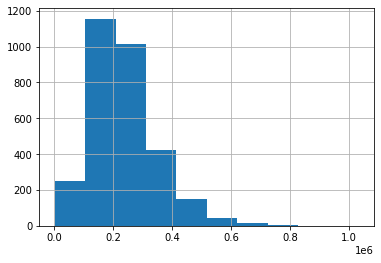

In [58]:
# take a quick peek at the target variable
fdata['SalePrice'].hist()
plt.show()

Take a look at the data with the changes made to numerical features and store the numerical features to keep for later use

In [59]:
fdata.drop(cols_to_drop, axis=1, inplace=True)

In [60]:
fdata.drop(['YrSold_YYYY'], axis=1, inplace=True)

In [61]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3061 entries, 1686 to 1281
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ZngCdPr       3061 non-null   object  
 1   ClassPr_S     3061 non-null   object  
 2   ClassSc_S     3061 non-null   object  
 3   SchD_S        3061 non-null   category
 4   TxD_S         3061 non-null   category
 5   Inst1_No      3039 non-null   object  
 6   Inst1TPr      3039 non-null   object  
 7   TtlVal_AsrYr  3061 non-null   int64   
 8   ValType       3061 non-null   object  
 9   Neighborhood  3061 non-null   object  
 10  LotArea       3061 non-null   float64 
 11  ParType       3061 non-null   object  
 12  DwlgNo_S      3061 non-null   int64   
 13  BldgType      3061 non-null   object  
 14  HouseStyle    3061 non-null   object  
 15  Foundation    3061 non-null   object  
 16  RoofMatl      3061 non-null   object  
 17  Ext1          3061 non-null   object  
 18  Ext2 

In [62]:
fdata['Season'] = fdata['MoSold_MM']

In [63]:
fdata['Season'] = fdata['MoSold_MM']

mrd = {1.0: 'Winter', 
       2.0: 'Winter', 
       3.0: 'Winter',
       4.0: 'Spring',
       5.0: 'Spring',
       6.0: 'Spring',
       7.0: 'Summer',
       8.0: 'Summer',
       9.0: 'Summer',
       10.0:'Autumn',
       11.0: 'Autumn',
       12.0: 'Autumn'
          }

fdata['Season'].replace(mrd, inplace=True)

In [64]:
fdata.groupby(['Season'])['SalePrice'].mean()

Season
Autumn    216422.508418
Spring    245335.585661
Summer    239651.192532
Winter    227877.141791
Name: SalePrice, dtype: float64

**Start looking at object/category type variables to run tests and identify which ones are pertinent to the model**

ClassPr_S: can be dropped...Residential for all values
Inst1_No: can be dropped..too many categories
ValType: can be dropped, people do not have access to this information easily
ParType: can be dropped, correlates well to DwlgNo_S
Foundation: can be dropped, foundation types most common dominate output
Ext2: not very helpful
Ext1: not very helpful
'ParclRel',
 'PA-Nmbr',
 'PA-Strt',
 'PA-StSfx',
 'Date',
 'Source', -- Remove all of these. Unique identifiers


ClassSc_S: changed to category type
neighborhood: as expected has a lot of variation and can be converted to category type
BldgType: as expected has a lot of variation and can be converted to category type
RoofMatl: good variation
MasVnrType: Check with stat test
Sale Type: Shows some important variation between new vs. remodeled.




In [65]:
# replace dict
rd = {
 'COD/Est': 'Other',
 'WRDCash': 'Other',
 'CtrLD&I': 'Other',
 'CtrLwDn': 'Other',
 'CtrLInt': 'Other',
 'NewCost': 'Other',
 'Ctr15/2': 'Other'
}

fdata['SaleType'].replace(rd, inplace=True)

In [66]:
fdata.SaleType.value_counts()

WRDConv    2772
NewSold     194
Other        95
Name: SaleType, dtype: int64

In [67]:
fdata['SaleType'].value_counts().index.to_list()

['WRDConv', 'NewSold', 'Other']

In [68]:
fdata.drop(['ParclRel',
 'PA-Nmbr',
 'PA-Strt',
 'PA-StSfx',
 'Date',
 'Source'], axis='columns', inplace=True)

In [69]:
fdata.columns[(fdata.dtypes == 'object') | (fdata.dtypes == 'category')].to_list()

['ZngCdPr',
 'ClassPr_S',
 'ClassSc_S',
 'SchD_S',
 'TxD_S',
 'Inst1_No',
 'Inst1TPr',
 'ValType',
 'Neighborhood',
 'ParType',
 'BldgType',
 'HouseStyle',
 'Foundation',
 'RoofMatl',
 'Ext1',
 'Ext2',
 'MasVnrType',
 'Heating',
 'Central Air',
 'PoolArea',
 'GarageType',
 'MoSold_MM',
 'SaleType',
 'SaleCond',
 'Season']

In [70]:
fdata['Age'] = fdata['Age'].astype('float')
fdata['GarageAge'] = fdata['GarageAge'].astype('float')

In [71]:
# convert object features to categorical
for col in fdata.columns[(fdata.dtypes == 'object') | (fdata.dtypes == 'category')].to_list():
    display(fdata[col].value_counts())

RL       1558
FS-RL     551
F-PRD     417
UCRM      227
F-VR      118
RH         78
RM         69
S-SMD      17
FS-RM      10
HOC         8
A           4
S-HM        1
S-GA        1
GI          1
NC          1
Name: ZngCdPr, dtype: int64

RESIDENTIAL    3061
Name: ClassPr_S, dtype: int64

1-STORY 1946 & NEWER ALL STYLES              1162
2-STORY 1946 & NEWER                          454
1-1/2 STORY FINISHED ALL AGES                 306
1-STORY TWNHM - 1946 & NEWER                  234
1-LEVEL CONDO 1946 & NEWER                    143
2-STORY TWNHM - 1946 & NEWER                  121
1-STORY 1945 & OLDER                          116
2-STORY 1945 & OLDER                          111
SPLIT OR MULTI-LEVEL                           95
DUPLEX - ALL STYLES AND AGES                   78
SPLIT FOYER                                    57
2 FAMILY CONVERSION - ALL STYLES AND AGES      51
2-LEVEL CONDO 1946 & NEWER                     50
2-1/2 STORY ALL AGES                           41
MULTILEVEL TWNHM  - INCL SPLIT LEV/FOYER       20
1-1/2 STORY - UNFINISHED ALL AGES              14
1-1/2 STORY CONDO - ALL AGES                    5
1-1/2 STORY TWNHM - ALL AGES                    2
MULTIPLE DWELLINGS - REGARDLESS OF TYPE         1
Name: ClassSc_S, dtype: int64

1    2621
5     440
Name: SchD_S, dtype: int64

1     2621
45     440
Name: TxD_S, dtype: int64

2018-00238    5
2019-04299    4
2021-06285    4
2017-10495    4
2021-13284    3
             ..
2020-03317    1
2021-10894    1
2018-01601    1
2018-04806    1
2018-07335    1
Name: Inst1_No, Length: 2673, dtype: int64

WRDJSV        1602
WD            1137
Q              149
COD             51
D               32
COTAFF          21
CTR             14
SWD             10
ESMT             7
MSC              4
COT              3
ASM OF CTR       2
AFF              2
SHD              2
AFFLEST          1
CNDO             1
O2               1
Name: Inst1TPr, dtype: int64

F    2974
B      39
P      33
I      14
A       1
Name: ValType, dtype: int64

N Ames     429
CollgCr    321
Edwards    224
OldTown    210
NRidgHt    184
Crawfor    132
Sawyer     123
Mitchel    120
NW Ames    118
Somerst    108
SawyerW    107
HaydnLk    101
BrkSide    100
Gilbert     83
IDOT&RR     82
Timber      75
NoRidge     71
GrnHill     63
ClearCr     57
Stonebr     44
MeadowV     37
S&W ISU     37
Bluestm     32
IOCondo     31
Br'Dale     30
Blmngtn     28
Veenker     28
NoPkVil     26
DakotaR     23
Landmrk     17
WllwCr1      8
WllwCr2      7
MsCondo      3
Greens       2
Name: Neighborhood, dtype: int64

Dwg&Lot    3061
Name: ParType, dtype: int64

1FamDet    2363
Twnhs-E     297
Condo       160
Twnhs-I     108
Duplex       79
2FmConv      54
Name: BldgType, dtype: int64

1-Story    1708
2-Story     768
1.5 Fin     326
S/Level     105
S/Foyer      96
2.5 Unf      36
1.5 Unf      13
2.5 Fin       9
Name: HouseStyle, dtype: int64

P'Conc     1392
C'Block    1187
Brk/Til     282
Slab        185
Stone        10
Wood          5
Name: Foundation, dtype: int64

CompShg    2961
Membran      51
Tar&Grv      27
WdShngl       9
WdShake       9
Roll          2
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64

VinylSd    1148
MetalSd     428
Wd Sdng     386
HdBoard     382
Plywood     200
CemntBd     193
BrkFace     170
Stucco       55
WdShing      53
AsbShng      34
BrkComm       9
AsphShn       1
ImStucc       1
C'Block       1
Name: Ext1, dtype: int64

VinylSd    1119
MetalSd     436
Wd Sdng     377
HdBoard     356
Plywood     221
CmentBd     188
BrkFace     127
Wd Shng      88
Stucco       68
Brk Cmn      27
AsbShng      27
ImStucc      17
Other         4
AsphShn       3
Stone         2
C'Block       1
Name: Ext2, dtype: int64

None       1687
BrkFace     726
Stone       557
No Data      61
Brk Cmn      30
Name: MasVnrType, dtype: int64

GasFWA     2995
GasHWat      21
OthElec      17
HeatPmp      10
Gravity       9
Geothrm       5
WallHtr       2
OthrHW        2
Name: Heating, dtype: int64

Yes    2925
No      136
Name: Central Air, dtype: int64

No     3046
Yes      15
Name: PoolArea, dtype: int64

Attachd    1880
Detachd     747
BuiltIn     146
None        139
No Data      78
Basment      43
2 Types      22
Carport       6
Name: GarageType, dtype: int64

4.0     1074
7.0      857
10.0     594
1.0      536
Name: MoSold_MM, dtype: int64

WRDConv    2772
NewSold     194
Other        95
Name: SaleType, dtype: int64

Normal     2566
Partial     199
Alloca      121
Abnorml     115
Family       47
AdjLand      13
Name: SaleCond, dtype: int64

Spring    1074
Summer     857
Autumn     594
Winter     536
Name: Season, dtype: int64

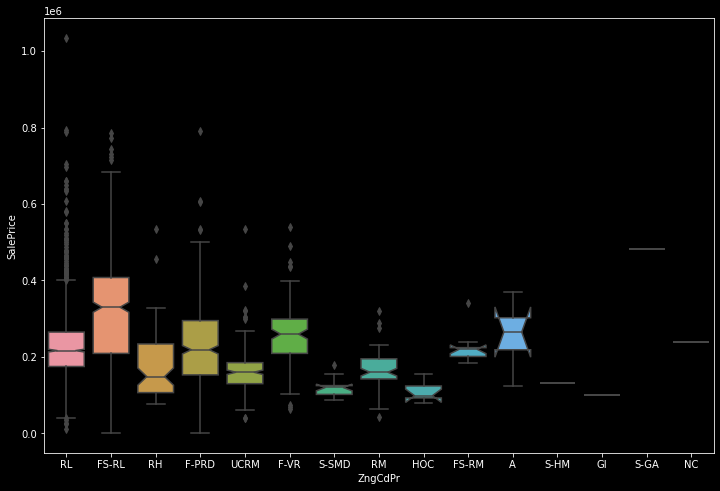

ValueError: Could not interpret input 'Inst1TPr'

<Figure size 864x576 with 0 Axes>

In [122]:
plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'ZngCdPr', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'Inst1TPr', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'ValType', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
ax = sns.boxplot(data = fdata, x = 'Neighborhood', y = 'SalePrice', notch=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'ParType', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'DwlgNo_S', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'BldgType', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'HouseStyle', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'Foundation', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'RoofMatl', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'Heating', y = 'SalePrice', notch=True)
plt.show()


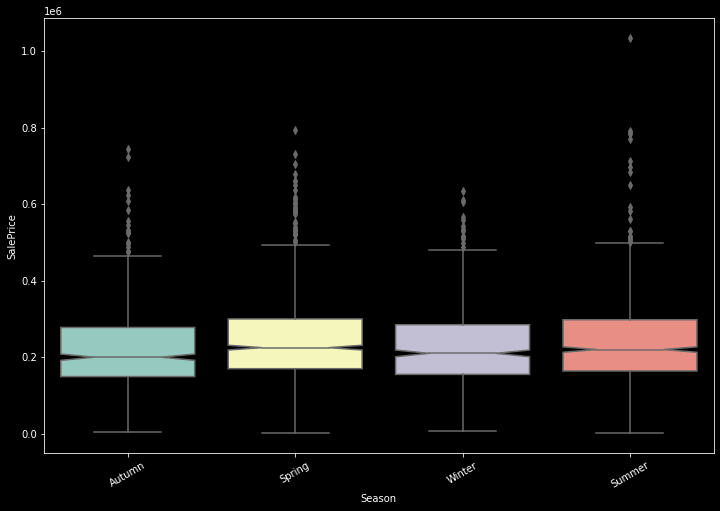

In [128]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(data = fdata, x = 'Season', y = 'SalePrice', notch=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

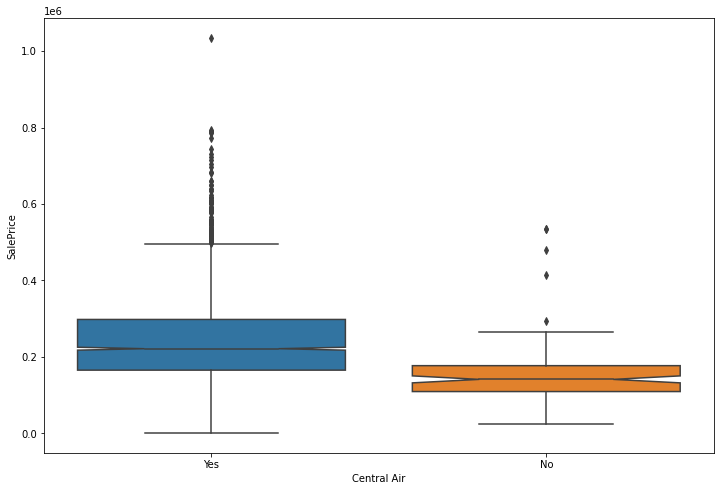

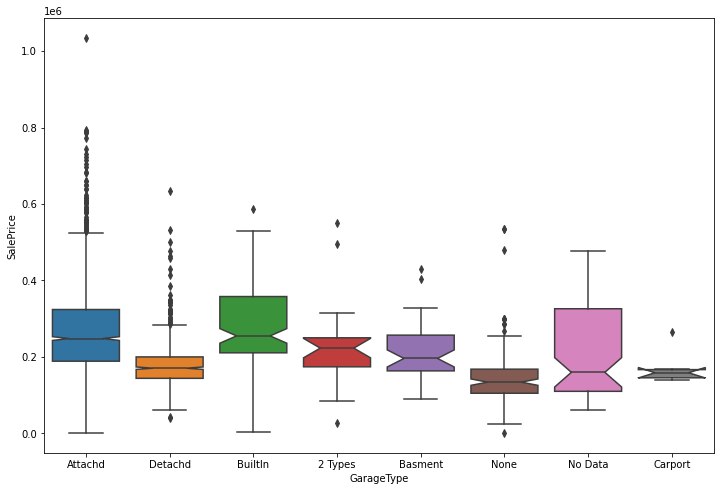

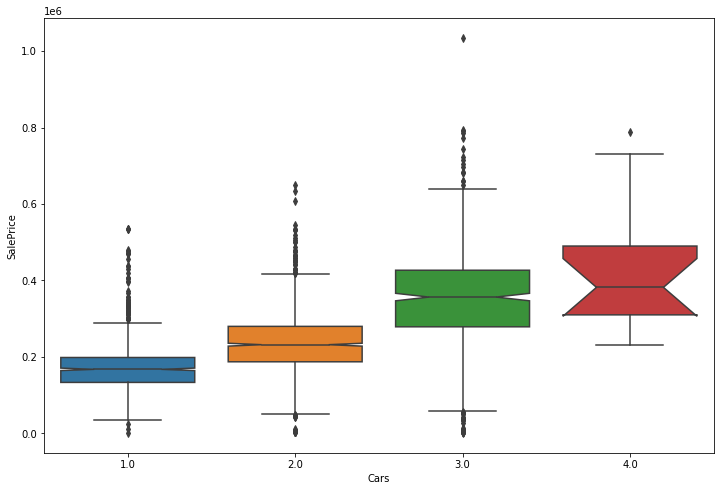

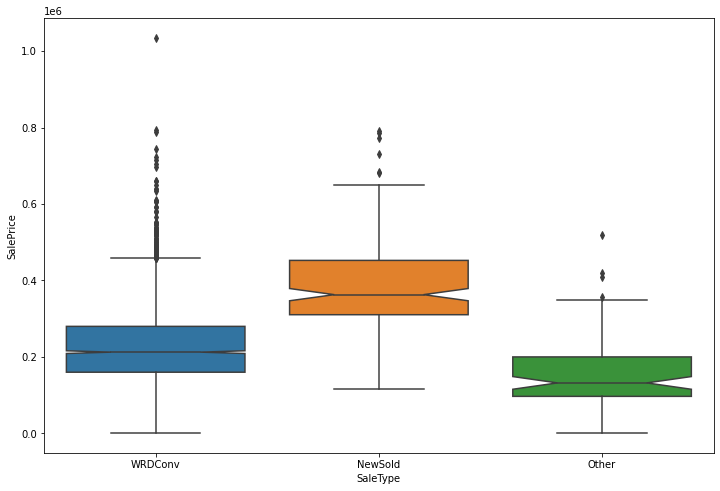

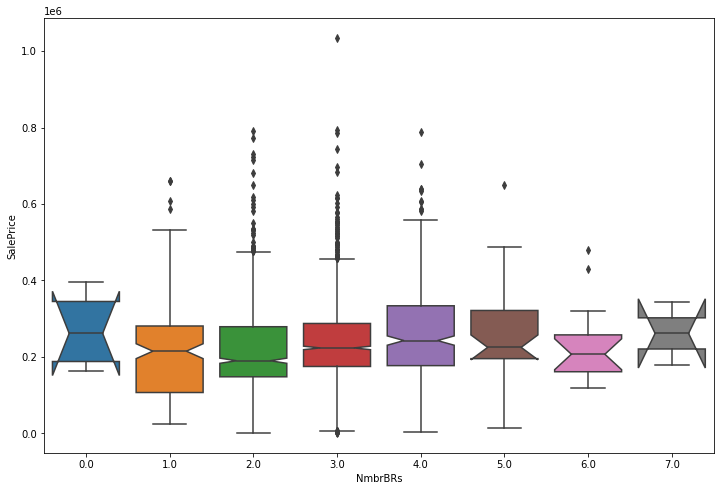

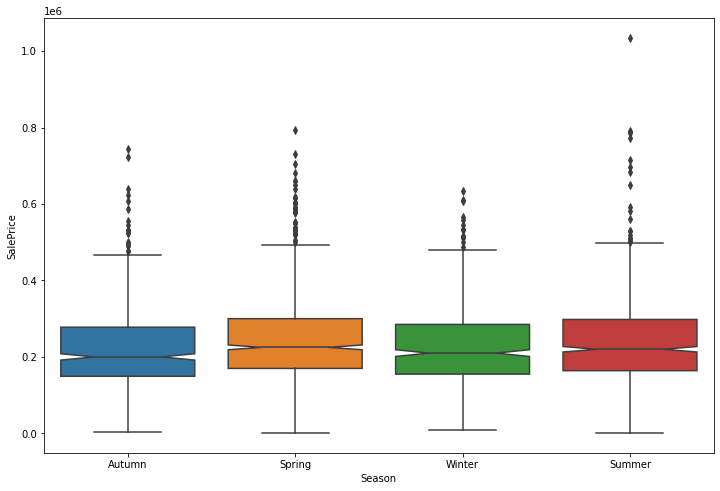

In [73]:
plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'Central Air', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'GarageType', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'Cars', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'SaleType', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'NmbrBRs', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'Season', y = 'SalePrice', notch=True)
plt.show()


In [74]:
fdata.drop(['ClassPr_S', 'MoSold_MM', 'TxD_S','GarYrBlt', 'Inst1TPr', 'Inst1_No', 'ValType', 'ParType', 'Foundation', 'Ext1', 'Ext2'], axis='columns', inplace=True)
fdata['ClassSc_S'] = fdata['ClassSc_S'].astype('category')
fdata['Neighborhood'] = fdata['Neighborhood'].astype('category')
fdata['RoofMatl'] = fdata['RoofMatl'].astype('category')
fdata['Heating'] = fdata['Heating'].astype('category')
fdata['Central Air'] = fdata['Central Air'].astype('category')
fdata['GarageType'] = fdata['GarageType'].astype('category')

In [75]:
fdata.groupby(['NmbrBRs'])['SalePrice'].mean()

NmbrBRs
0.0    270400.200000
1.0    211942.311224
2.0    222734.271150
3.0    237337.090602
4.0    263211.041872
5.0    259627.486486
6.0    235747.142857
7.0    261500.000000
Name: SalePrice, dtype: float64

In [76]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3061 entries, 1686 to 1281
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ZngCdPr       3061 non-null   object  
 1   ClassSc_S     3061 non-null   category
 2   SchD_S        3061 non-null   category
 3   TtlVal_AsrYr  3061 non-null   int64   
 4   Neighborhood  3061 non-null   category
 5   LotArea       3061 non-null   float64 
 6   DwlgNo_S      3061 non-null   int64   
 7   BldgType      3061 non-null   object  
 8   HouseStyle    3061 non-null   object  
 9   RoofMatl      3061 non-null   category
 10  MasVnrType    3061 non-null   object  
 11  Heating       3061 non-null   category
 12  Central Air   3061 non-null   category
 13  GLA           3061 non-null   float64 
 14  TtlBsmtSF     3061 non-null   float64 
 15  TotRmsAbvGrd  3061 non-null   float64 
 16  Fireplaces    3061 non-null   float64 
 17  PoolArea      3061 non-null   category
 18  Garag

In [77]:
# create a list of columns to keep
model_cols = fdata.drop(['SalePrice'], axis=1).columns.to_list()

In [78]:
len(model_cols)

28

In [79]:
model_cols

['ZngCdPr',
 'ClassSc_S',
 'SchD_S',
 'TtlVal_AsrYr',
 'Neighborhood',
 'LotArea',
 'DwlgNo_S',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'MasVnrType',
 'Heating',
 'Central Air',
 'GLA',
 'TtlBsmtSF',
 'TotRmsAbvGrd',
 'Fireplaces',
 'PoolArea',
 'GarageType',
 'Cars',
 'GarageArea',
 'SaleType',
 'SaleCond',
 'NmbrBRs',
 'hpi_ames',
 'Age',
 'GarageAge',
 'Season']

In [80]:
# cleaning function
def clean_data(fdata, model_cols):
    # find age at the time of sale
    fdata['Age'] = fdata['YrSold_YYYY'] - fdata['YrBuilt']
    fdata['Age'] = fdata['Age'].astype('float')
    fdata['GarageAge'] = fdata['YrSold_YYYY'] - fdata['GarYrBlt']
    fdata['GarageAge'] = fdata['GarageAge'].astype('float')
    
    fdata['SchD_S'] = fdata['SchD_S'].astype('category')
    
    fdata['PoolArea'][fdata['PoolArea'] != 0] = 'Yes'
    fdata['PoolArea'][fdata['PoolArea'] == 0] = 'No'
    
    for col in [
     'PoolArea']:
        fdata[col] = fdata[col].astype('category')
        
    fdata['Season'] = fdata['MoSold_MM']
    mrd = {1.0: 'Winter', 
           2.0: 'Winter', 
           3.0: 'Winter',
           4.0: 'Spring',
           5.0: 'Spring',
           6.0: 'Spring',
           7.0: 'Summer',
           8.0: 'Summer',
           9.0: 'Summer',
           10.0:'Autumn',
           11.0: 'Autumn',
           12.0: 'Autumn'
              }
    fdata['Season'].replace(mrd, inplace=True)
    
    fdata['ClassSc_S'] = fdata['ClassSc_S'].astype('category')
    fdata['Neighborhood'] = fdata['Neighborhood'].astype('category')
    fdata['RoofMatl'] = fdata['RoofMatl'].astype('category')
    fdata['Heating'] = fdata['Heating'].astype('category')
    fdata['Central Air'] = fdata['Central Air'].astype('category')
    fdata['GarageType'] = fdata['GarageType'].astype('category')
    
    # replace dict
    rd = {
     'COD/Est': 'Other',
     'WRDCash': 'Other',
     'CtrLD&I': 'Other',
     'CtrLwDn': 'Other',
     'CtrLInt': 'Other',
     'NewCost': 'Other',
     'Ctr15/2': 'Other'
    }

    fdata['SaleType'].replace(rd, inplace=True)
    
    fdata = fdata[model_cols]
    
    for col in fdata.columns[fdata.dtypes == 'object'].to_list():
        fdata[col] = fdata[col].astype('category')
    
    return fdata
    
    

In [81]:
train = clean_data(X_train, model_cols)

In [82]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 125 to 3206
Data columns (total 73 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MapRefNo      1021 non-null   float64
 1   GeoRefNo      1021 non-null   int64  
 2   Tier          1021 non-null   int64  
 3   Range         1021 non-null   int64  
 4   Prop_Addr     1021 non-null   object 
 5   ZngCdPr       1021 non-null   object 
 6   ClassPr_S     1021 non-null   object 
 7   ClassSc_S     1021 non-null   object 
 8   Legal_Pr      1021 non-null   object 
 9   SchD_S        1021 non-null   int64  
 10  TxD_S         1021 non-null   int64  
 11  MA_Ownr1      1021 non-null   object 
 12  MA_Line1      1020 non-null   object 
 13  MA_City       1020 non-null   object 
 14  MA_State      1020 non-null   object 
 15  MA_Zip1       1020 non-null   float64
 16  Rcrd_Yr       1017 non-null   float64
 17  Rcrd_Mo       1017 non-null   float64
 18  Inst1_No      1017 non-nul

In [83]:
X_test = clean_data(X_test, model_cols)

Create a function to process the test data prior to making a prediction:


In [84]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 125 to 3206
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ZngCdPr       1021 non-null   category
 1   ClassSc_S     1021 non-null   category
 2   SchD_S        1021 non-null   category
 3   TtlVal_AsrYr  1021 non-null   int64   
 4   Neighborhood  1021 non-null   category
 5   LotArea       1021 non-null   float64 
 6   DwlgNo_S      1021 non-null   int64   
 7   BldgType      1021 non-null   category
 8   HouseStyle    1021 non-null   category
 9   RoofMatl      1021 non-null   category
 10  MasVnrType    1021 non-null   category
 11  Heating       1021 non-null   category
 12  Central Air   1021 non-null   category
 13  GLA           1021 non-null   float64 
 14  TtlBsmtSF     1021 non-null   float64 
 15  TotRmsAbvGrd  1021 non-null   float64 
 16  Fireplaces    1021 non-null   float64 
 17  PoolArea      1021 non-null   category
 18  Garage

In [85]:
# categorize month sold - bin 4 seasons
# hpi - add this
# geo 1st, zip second,  - geo data 
# pdp - partial depen. plot, marginal change - 
# xgboost
# use pdp to find marginal change - get pp10 > 60%
# pp10, pp30, pp50

<h2>3.0 Models</h2> <a id = 'models'></a>

***

training data 

In [86]:
import xgboost as xgb

#reg matrix
X_train_reg = xgb.DMatrix(train, y_train, enable_categorical=True)

In [87]:
params = {"objective": "reg:squarederror", "eta":.01}
n = 500

results = xgb.cv(
   params, X_train_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20,
    verbose_eval=50,
)

[0]	train-rmse:258431.35500+868.52425	test-rmse:258423.50782+3471.13564
[50]	train-rmse:160123.13492+579.28217	test-rmse:161407.72108+2662.95996
[100]	train-rmse:101069.86376+453.50319	test-rmse:104368.44636+3117.18725
[150]	train-rmse:66084.50639+407.44497	test-rmse:72198.43171+3792.63000
[200]	train-rmse:45846.00197+380.42609	test-rmse:55252.29187+4183.03131
[250]	train-rmse:34573.74916+324.39550	test-rmse:46961.03558+4413.14016
[300]	train-rmse:28409.19978+272.04872	test-rmse:43154.29385+4428.83701
[350]	train-rmse:25036.48945+244.71052	test-rmse:41566.23854+4327.39251
[400]	train-rmse:23208.12213+276.31866	test-rmse:40823.71875+4116.58402
[450]	train-rmse:22109.79706+287.91469	test-rmse:40429.87547+3943.95889
[499]	train-rmse:21384.83921+274.75231	test-rmse:40235.78373+3851.07786


In [88]:
results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,258431.354999,868.524247,258423.507823,3471.135636
1,255938.890296,859.760062,255944.382190,3434.442002
2,253471.717538,851.231024,253491.710497,3395.718876
3,251029.219644,842.723010,251061.679095,3359.394827
4,248612.054905,834.429243,248663.507074,3319.869614
...,...,...,...,...
495,21438.982602,272.674800,40249.695881,3856.494001
496,21421.121364,276.479261,40247.312059,3856.623586
497,21409.237010,276.721823,40245.772006,3854.927979
498,21396.924066,276.266703,40240.860930,3853.242053


In [89]:
params = {"objective": "reg:squarederror", "eta":.01}
n = 500

model = xgb.train(
   params, X_train_reg,
   num_boost_round=n,
    verbose_eval=50,
)

In [90]:
y_pred_train = model.predict(X_train_reg)

In [91]:
np.corrcoef(y_train, y_pred_train)

array([[1.        , 0.98047132],
       [0.98047132, 1.        ]])

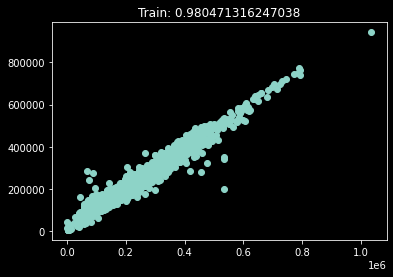

In [131]:
plt.scatter(y_train, y_pred_train)
plt.title(f'Train: {np.corrcoef(y_train, y_pred_train)[0][1]}')
plt.show()

testing

In [93]:
X_test_reg = xgb.DMatrix(X_test, enable_categorical=True)

In [94]:
y_pred = model.predict(X_test_reg)

In [95]:
np.corrcoef(y_test, y_pred)

array([[1.        , 0.95289173],
       [0.95289173, 1.        ]])

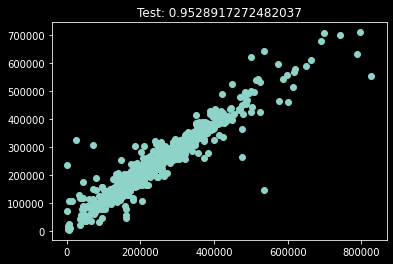

In [132]:
plt.scatter(y_test, y_pred)
plt.title(f'Test: {np.corrcoef(y_test, y_pred)[0][1]}')
plt.show()

In [97]:
pp10_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})

In [98]:
pp10_df['pp10_yes'] = (np.absolute(y_test-y_pred)/y_test) *100

In [99]:
pp10_df[pp10_df['pp10_yes'] < 10].shape[0] / pp10_df.shape[0]

0.7051909892262488

In [100]:
pp20_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
pp20_df['pp20_yes'] = (np.absolute(y_test-y_pred)/y_test) *100
pp20_df[pp20_df['pp20_yes'] < 20].shape[0] / pp20_df.shape[0]

0.8873653281096964

In [101]:
pp30_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
pp30_df['pp30_yes'] = (np.absolute(y_test-y_pred)/y_test) *100
1 - pp30_df[pp30_df['pp30_yes'] < 30].shape[0] / pp30_df.shape[0]

0.0636630754162586

In [102]:
(y_test - y_pred).mean()

1311.6721368354401

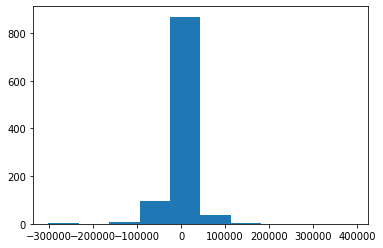

In [103]:
plt.hist(y_test-y_pred)
plt.show()

In [104]:
# feature importances

fi = model.get_score(importance_type = 'gain')

In [105]:
feature = fi.keys()
importance = fi.values()

In [106]:
fi_df = pd.DataFrame(feature, importance).reset_index()
fi_df.columns = ['Importance', 'Feature']

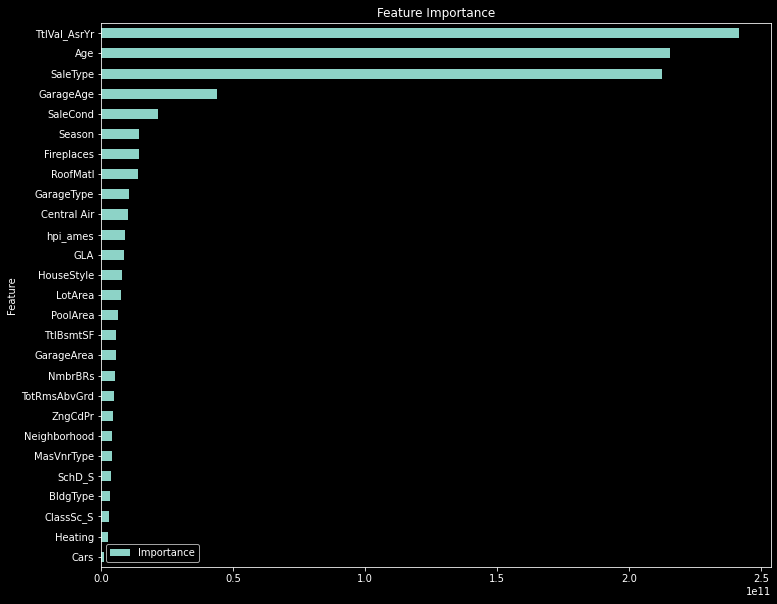

In [136]:
plt.style.use('dark_background')
fi_df.sort_values(['Importance']).plot(kind='barh', y='Importance', x='Feature', figsize=(12,10))
plt.title('Feature Importance')
plt.show()

In [133]:
# calculate rmse for the train and test sets
from sklearn.metrics import mean_squared_error, mean_absolute_error

# errors

print(np.sqrt(mean_squared_error(y_train, y_pred_train)))
print(mean_absolute_error(y_train, y_pred_train))

print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

22641.53968370829
14860.416243734177
35060.57256807842
19971.067725948444


In [135]:
np.absolute(y_pred - y_test).mean()

19971.067725948444

In [109]:
zill_test['PredictedPrice'] = y_pred
zill_test['SalePrice'] = y_test
zill_test['Difference'] = np.absolute(zill_test['SalePrice'] - zill_test['PredictedPrice'])

In [121]:
pd.options.display.max_rows = 1100
display(zill_test[['Prop_Addr', 'SalePrice', 'TtlVal_AsrYr', 'YrSold_YYYY',
       'MoSold_MM','PredictedPrice','Difference']].sort_values('Difference'))

,Prop_Addr,SalePrice,TtlVal_AsrYr,YrSold_YYYY,MoSold_MM,PredictedPrice,Difference
3031,5453 ROWLING DR,53197.0,298700,2018,7,53214.203125,17.203125
4006,713 GARNET DR,103900.0,104100,2018,1,103844.921875,55.078125
35,1805 LEDGES DR,83000.0,425600,2018,4,82932.437500,67.562500
1355,2130 PRAIRIE VIEW EAST,245000.0,236700,2019,10,244880.828125,119.171875
3542,1416 BIG BLUESTEM CT UNIT 103,136000.0,134100,2019,4,136121.625000,121.625000
3120,4510 TWAIN CIR UNIT 105,129116.0,143900,2018,4,128955.859375,160.140625
3601,1326 LINCOLN WAY,200000.0,197900,2018,4,199833.125000,166.875000
678,2916 ROXBORO DR,279750.0,287500,2020,4,279921.218750,171.218750
1232,2808 HAMPTON ST,242250.0,228600,2019,4,242071.671875,178.328125
3103,908 POE AVE,238900.0,227400,2020,4,239082.140625,182.140625


In [141]:
zill_test[['Prop_Addr', 'SalePrice', 'TtlVal_AsrYr','PredictedPrice','Difference']].sort_values('Difference').tail(4)

,Prop_Addr,SalePrice,TtlVal_AsrYr,PredictedPrice,Difference
145,5726 QUARRY DR,70310.0,374000,308380.09375,238070.09375
110,1912 LEOPOLD DR,827581.0,588200,551207.93750,276373.06250
1009,3904 ALDRIN AVE,25000.0,433800,326351.93750,301351.93750
2562,3114 WOODLAND ST,535000.0,120700,145577.93750,389422.06250


In [112]:
zill_test.columns

Index(['MapRefNo', 'GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr',
       'ClassPr_S', 'ClassSc_S', 'Legal_Pr', 'SchD_S', 'TxD_S', 'MA_Ownr1',
       'MA_Line1', 'MA_City', 'MA_State', 'MA_Zip1', 'Rcrd_Yr', 'Rcrd_Mo',
       'Inst1_No', 'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S',
       'OthAc_S', 'TtlVal_AsrYr', 'ValType', 'LndAcX1S', 'ImpAcX1S',
       'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1',
       'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType', 'BldgNo_S',
       'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SaleType', 'SaleCond', 'ParclRel', 'PA-Nmbr', 'PA-Strt',
       'PA-StSfx', 'Date', 'Source', 'NmbrBRs', 'hpi_ames', 'PredictedPrice',
       'SalePrice', 'Difference'],


sklearn implementation:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

In [ ]:
pd.get_dummies(train)

In [ ]:
# set up pipe steps
steps = [('xgb', GradientBoostingRegressor(random_state = 28))]

# create the pipeline
xgb_model = Pipeline(steps)

# set parameters
params = {'xgb__loss': ['squared_error', 'absolute_error'],
          'xgb__learning_rate': [.1, .01, .001],
          'xgb__n_estimators': [100, 250, 500],
          'xgb__criterion': ['friedman_mse', 'squared_error'],
         'xgb__max_features': ['auto', 'sqrt', 'log2']}

X_train = pd.get_dummies(train)

# fit the object to the train set
xgb_model = GridSearchCV(xgb_model, params, cv=5)
xgb_model.fit(X_train,y_train)

In [ ]:
xgb_model.best_params_


In [ ]:
xgb_model.best_score_

In [ ]:
X_test_sklearn = pd.get_dummies(X_test)

In [ ]:
for col in X_train.columns.to_list():
    if col not in X_test_sklearn.columns.to_list():
        X_test_sklearn[col] = 0

In [ ]:
for col in X_test_sklearn.columns.to_list():
    if col not in X_train.columns.to_list():
        X_test_sklearn.drop([col], axis=1, inplace=True)

In [ ]:
y_pred = xgb_model.predict(X_test_sklearn)

In [ ]:
plt.hist(y_pred-y_test)
plt.show()

In [ ]:
np.corrcoef(y_pred, y_test)

### 3.1 - Random Forest <a id = 'rf'></a>


In [ ]:
# get key imports for modeling with RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import lightgbm

In [ ]:
# seperate target vector and feature matrix
X = fdata.drop(['SalePrice'], axis = 'columns')
y = fdata['SalePrice']

In [ ]:
# create dummy variables prior to loading into the model
X = pd.get_dummies(X)

In [ ]:
# set up pipe steps
steps = [('scaler', StandardScaler()), ('rf', RandomForestRegressor(random_state = 28, oob_score=True))]

# create the pipeline
rf_model = Pipeline(steps)

# set parameters
params = {'rf__criterion': ['squared_error', 'absolute_error'],
         'rf__max_features': ['auto', 'sqrt', 'log2']}

# fit the object to the train set
rf_model = GridSearchCV(rf_model, params, cv=5)
rf_model.fit(X,y)

# cross val score
#cross_val_score(rf_model, X_train, y_train, cv = 5)

In [ ]:
# cross val score
rf_model.best_params_

In [ ]:
rf_model.best_estimator_

In [ ]:
rf_model.best_score_

In [ ]:
rf_model.best_estimator_.named_steps['rf'].feature_importances_

In [ ]:
fi_df = pd.DataFrame([X.columns.to_list(),rf_model.best_estimator_.named_steps['rf'].feature_importances_]).T
fi_df.columns = ['Feature', 'Importance']

In [ ]:
fi_df.sort_values(['Importance']).plot(kind='barh', x='Feature', y='Importance',figsize=(16,32))
plt.show()

In [ ]:
fi_df

In [ ]:
y_pred = rf_model.predict(X)

In [ ]:
plt.plot(y, y_pred, marker = '.', linestyle = 'none')
plt.title(f'The correlation coefficient is: {np.corrcoef(y,y_pred)[0][1]}')
plt.show()
#plt.scatter(range(len(y_test)), (y_test-y_pred))
#plt.title('The residuals are all centered around zero with the exception of a few outliers')
plt.show()
plt.hist((y - y_pred))
plt.show()

In [ ]:
# define RMSLE as a function
def rmsle(y_test, y_pred):
    vector_to_square = np.log(y_test + 1) - np.log(y_pred + 1)
    inside_avg = np.mean(vector_to_square**2)
    rmsle_value = np.sqrt(inside_avg)
    return rmsle_value

rmsle(y_test, y_pred)

### 3.2 - Linear Regression <a id = 'lr'></a>

In [ ]:
# set up pipe steps
lr_steps = [('scaler', StandardScaler()), ('lr', LinearRegression())]

# create the pipeline
lr_model = Pipeline(lr_steps)

# set parameters
# not necessary here

# fit to training set
lr_model.fit(X,y)


In [ ]:
test_predictions = lr_model.predict(X)

In [ ]:
plt.scatter(x=y, y=test_predictions)
plt.show()

In [ ]:
np.corrcoef(y, test_predictions)

In [ ]:
# predictions
y_pred = lr_model.predict(X_test)

# plot linear regression predictions
plt.plot(y_test, y_pred, marker = '.', linestyle = 'none', color='green')
plt.title('Linear Regression Model')
plt.show()

# print error metric
# rmsle(y_test, y_pred)

The Random Forest Model performs better.

<h2>4.0 Testing & Evaluation</h2> <a id = 'testing_evaluation'></a>

***

### 4.1 Test Data - Cleaning & Preprocessing<a id = 'tdcap'></a>

In [ ]:
# load the data
test_data = pd.read_csv('test.csv')


In [ ]:
columns_to_keep = list(fdata.columns)[:-1]

In [ ]:
test_data = test_data[columns_to_keep]

In [ ]:
test_data.info()

In [ ]:
for col in list(test_data.columns):
    test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

In [ ]:
test_data.info()

In [ ]:
# convert to category like train data
test_data['MSSubClass'] = test_data['MSSubClass'].astype('category')

In [ ]:
test_data['Functional'].replace(func_rep_dict, inplace = True)

### 4.2 Retrain Model w/ Full Training Data<a id = 'rm'></a>

In [ ]:
# seperate target vector and feature matrix
X_train = fdata.drop(['SalePrice'], axis = 'columns')
y_train = fdata['SalePrice']

In [ ]:
X_train = pd.get_dummies(X_train).drop(['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Electrical_Mix'], axis = 'columns')

In [ ]:
X_train['MSSubClass_150'] = 0

X_train.shape

In [ ]:
# fit the model to the full train set
rf_model.fit(X_train,y_train)

# cross val score
cross_val_score(rf_model, X_train, y_train, cv = 5)

In [ ]:
# get the predictions for the test set
# rough expectation around .16 RMSLE
X_test = pd.get_dummies(test_data)
X_test.shape

In [ ]:
# fit model to get results
test_pred = rf_model.predict(X_test)

In [ ]:
# load in sample given
submission_format = pd.read_csv('sample_submission.csv')

In [ ]:
submission_format.SalePrice = test_pred

In [ ]:
submission_format.to_csv('submission_rf_model_best.csv', index=False)

### 4.3 Model Performance Score & Rank<a id = 'se'></a>

In [ ]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="score_rank.png", width=1000, height=1000)

This model and score ranked 3746/4655 which is not that good. The next iteration will have better additional models like xgboost, lightgbm, etc.